<h1 style="font-size:3rem;color:orange;"> VL Jupyter Notebook</h1>

In [77]:
#Import Pandas
import pandas

In [78]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    BaggingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import GridSearchCV
!pip install shap

In [79]:
# Loading the dataset
file_path = 'C:/Users/mnzilani/VL Machine Learning/Turkana_LagsF (1).xlsx'
lags = pd.read_excel(file_path, sheet_name=None)

In [80]:
# View sheet names
print("Sheet Names:", lags.keys())

Sheet Names: dict_keys(['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8'])


In [81]:
#Looking at the data types
lags["L2"].dtypes

villages                                          object
lat                                              float64
lon                                              float64
SUB_COUNTY                                        object
HOSPITAL                                          object
HOSPITAL_LAT                                     float64
HOSPITAL_LONG                                    float64
OUT_PATIENT                                       object
INDEX                                              int64
Village.ID                                         int64
VILLAGE.GEO.CORRDINATES.COUNTY.COUNTRY            object
SUB_COUNTY_OF_PATIENT                             object
SEX                                               object
AGE                                              float64
DATE_SEEN                                 datetime64[ns]
RDT_rk39                                          object
Infections                                         int64
forest_height                  

In [82]:
# Correlation matrix
selected_columns = ['AGE', 'Infections', 'forest_height','population_density','Distance_to_Water_.km.','Elevation','LULC','tempmax','tempmin','mean_temp','mean_humidity','total_precip','soil_type','Brightness','Wetness','Greenness']
selected_data = lags["L1"][selected_columns]
# Compute the correlation matrix
correlation_matrix = selected_data.corr()
print(correlation_matrix)

                             AGE  Infections  forest_height  \
AGE                     1.000000   -0.126183      -0.016148   
Infections             -0.126183    1.000000      -0.001697   
forest_height          -0.016148   -0.001697       1.000000   
population_density     -0.016639   -0.056753      -0.057735   
Distance_to_Water_.km.  0.001925   -0.110625       0.077888   
Elevation              -0.007903   -0.129642       0.095811   
LULC                   -0.017490    0.171706      -0.058419   
tempmax                -0.013763    0.104570      -0.100080   
tempmin                -0.012790    0.113587      -0.098442   
mean_temp              -0.013525    0.110600      -0.100945   
mean_humidity           0.038515    0.008898      -0.008952   
total_precip           -0.009613   -0.085791      -0.000583   
soil_type               0.033599   -0.102569       0.095720   
Brightness              0.037324   -0.044178       0.055210   
Wetness                -0.010958    0.060540      -0.03

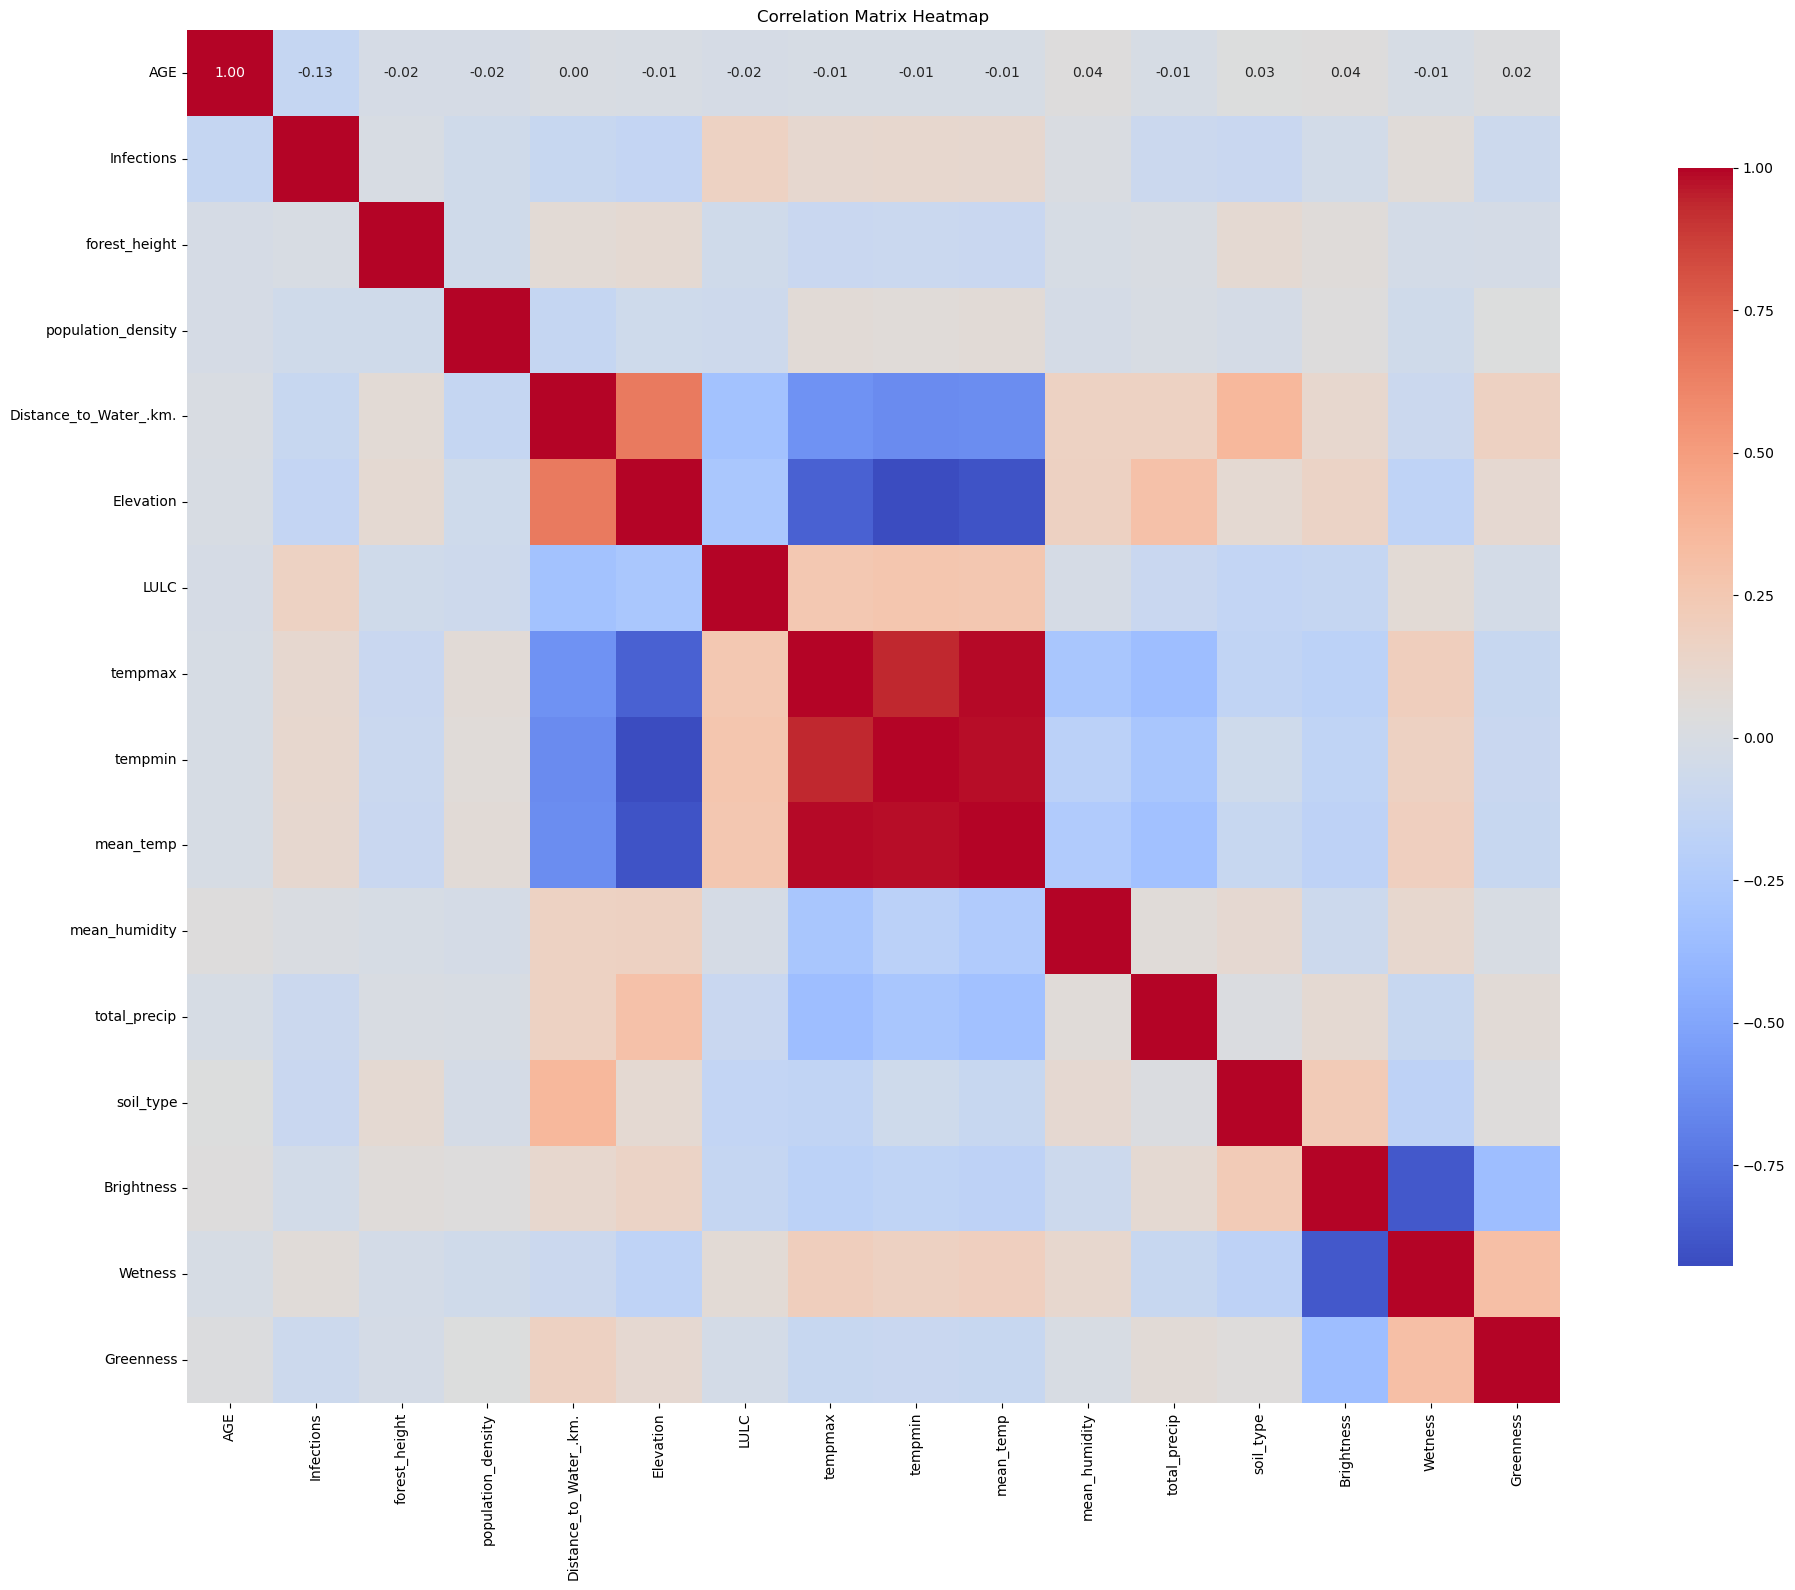

In [83]:

plt.figure(figsize=(24, 16))
# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
)

plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()



In [84]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVC": SVC(kernel="linear", probability=True),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME"),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging": BaggingClassifier(DecisionTreeClassifier()),
}

In [85]:
X = lags["L1"][
    [
        "SEX",
        "AGE",
        "distance",
        "population_density",
        "Distance_to_Water_.km.",
        "Elevation",
        "LULC",
        "tempmax",
        "tempmin",
        "mean_temp",
        "mean_humidity",
        "total_precip",
        "forest_height",
        "soil_type",
        "Brightness",
        "Greenness",
        "Wetness",
    ]  
]
y = lags["L1"]["Infections"]

In [86]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    auc = roc_auc_score(y_test, y_prob)

    fpr, tpr, _ = roc_curve(y_test, y_prob)

    return accuracy, precision, recall, f1, auc, fpr, tpr

In [87]:

features = [
    "SEX",
    "AGE",
    "distance",
    "population_density",
    "Distance_to_Water_.km.",
    "Elevation",
    "LULC",
    "tempmax",
    "tempmin",
    "mean_temp",
    "mean_humidity",
    "total_precip",
    "forest_height",
    "soil_type",
    "Greenness",
    "Brightness",
    "Wetness",
] 

# Initialize an empty list to store metrics
metrics_data = []

In [88]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the scaler
scaler = StandardScaler()

# Loop through each lag and fit models
for lag_name, lag_data in lags.items():
    # Separate features and target variable
    X = lag_data[features]
    y = lag_data["Infections"]

    # One-hot encode categorical variables
    X_encoded = pd.get_dummies(X, drop_first=True)  # Converts categorical data into numerical

    # Scale the numerical data
    X_scaled = scaler.fit_transform(X_encoded)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    # Loop through models and fit them
    for model_name, model_pipeline in models.items():
        model_pipeline.fit(X_train, y_train)

        # Evaluate the model
        accuracy, precision, recall, f1, auc, fpr, tpr = evaluate_model(
            model_pipeline, X_test, y_test
        )

        # Append metrics data
        metrics_data.append(
            {
                "Lag": lag_name,
                "Model": model_name,
                "Accuracy": accuracy,
                "Precision": precision,
                "Recall": recall,
                "F1-Score": f1,
                "AUC": auc,
                "fpr": fpr,
                "tpr": tpr,
            }
        )


Performance Evaluation

In [89]:
# Convert the metrics list into a DataFrame
metrics_df = pd.DataFrame(metrics_data)
performance_metrics = ["Precision", "Accuracy", "Recall", "F1-Score", "AUC"]

In [90]:
# Determine the best lag for each metric
best_lag_accuracy = metrics_df.loc[metrics_df["Accuracy"].idxmax()]["Lag"]
best_lag_precision = metrics_df.loc[metrics_df["Precision"].idxmax()]["Lag"]
best_lag_recall = metrics_df.loc[metrics_df["Recall"].idxmax()]["Lag"]
best_lag_f1 = metrics_df.loc[metrics_df["F1-Score"].idxmax()]["Lag"]
best_lag_auc = metrics_df.loc[metrics_df["AUC"].idxmax()]["Lag"]

In [91]:
# Determine the best model for each metric
best_model_accuracy = metrics_df.loc[metrics_df["Accuracy"].idxmax()]["Model"]
best_model_precision = metrics_df.loc[metrics_df["Precision"].idxmax()]["Model"]
best_model_recall = metrics_df.loc[metrics_df["Recall"].idxmax()]["Model"]
best_model_f1 = metrics_df.loc[metrics_df["F1-Score"].idxmax()]["Model"]
best_model_auc = metrics_df.loc[metrics_df["AUC"].idxmax()]["Model"]

In [92]:
def plot_best_lag_and_model_performance(df, metric):
    # Determine the best lag by averaging the metrics
    best_lag = df.groupby("Lag")[metric].mean().idxmax()
    best_lag_df = df[df["Lag"] == best_lag]

    # Determine the best model by averaging the metrics
    best_model = df.groupby("Model")[metric].mean().idxmax()
    best_model_df = df[df["Model"] == best_model]

    # Create a figure with 1 row and 2 columns of subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Plot for the best lag
    ax1 = sns.barplot(
        x="Model", y=metric, data=best_lag_df, palette="Set2", ax=axes[0], hue="Model"
    )
    ax1.set_title(f"{metric} by Model for The Best Lag ({best_lag})")

    # Annotate the bars
    for p in ax1.patches:
        ax1.annotate(
            f"{p.get_height():.1%}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 10),
            textcoords="offset points",
        )

    # Plot for the best model
    ax2 = sns.barplot(
        x="Lag", y=metric, data=best_model_df, palette="Set2", ax=axes[1], hue="Lag"
    )
    ax2.set_title(f"{metric} by Lag for The Best Model ({best_model})")

    # Annotate bars
    for p in ax2.patches:
        ax2.annotate(
            f"{p.get_height():.1%}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 10),
            textcoords="offset points",
        )

    plt.tight_layout()
    plt.show()

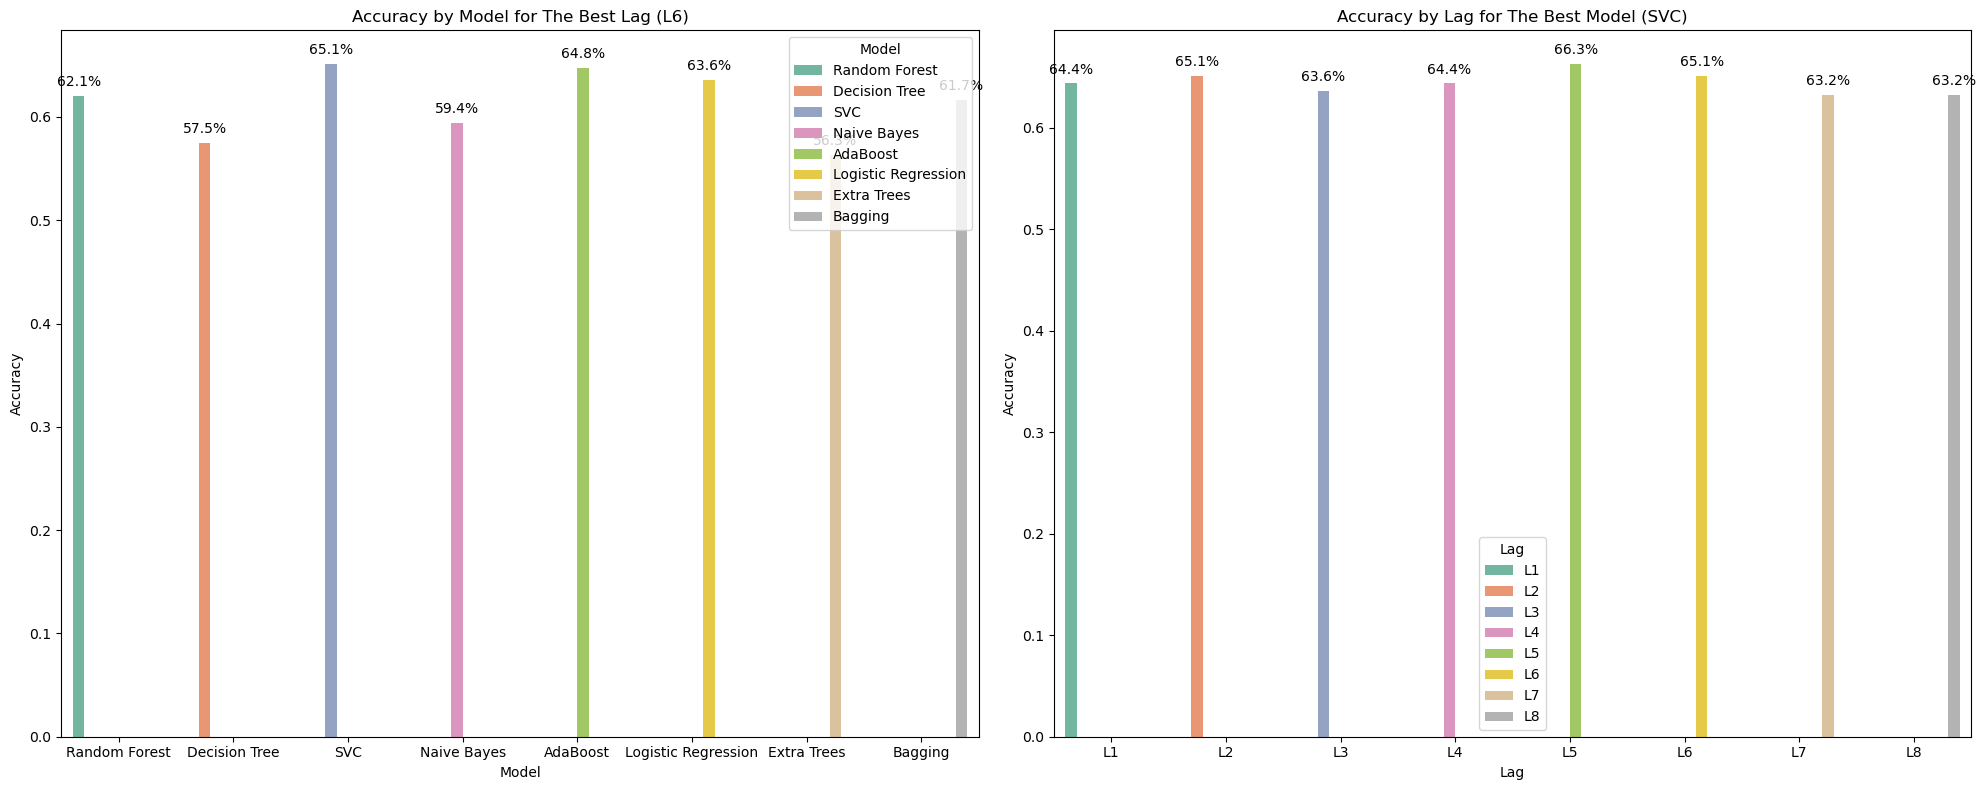

In [93]:
# Accuracy
plot_best_lag_and_model_performance(metrics_df, "Accuracy")

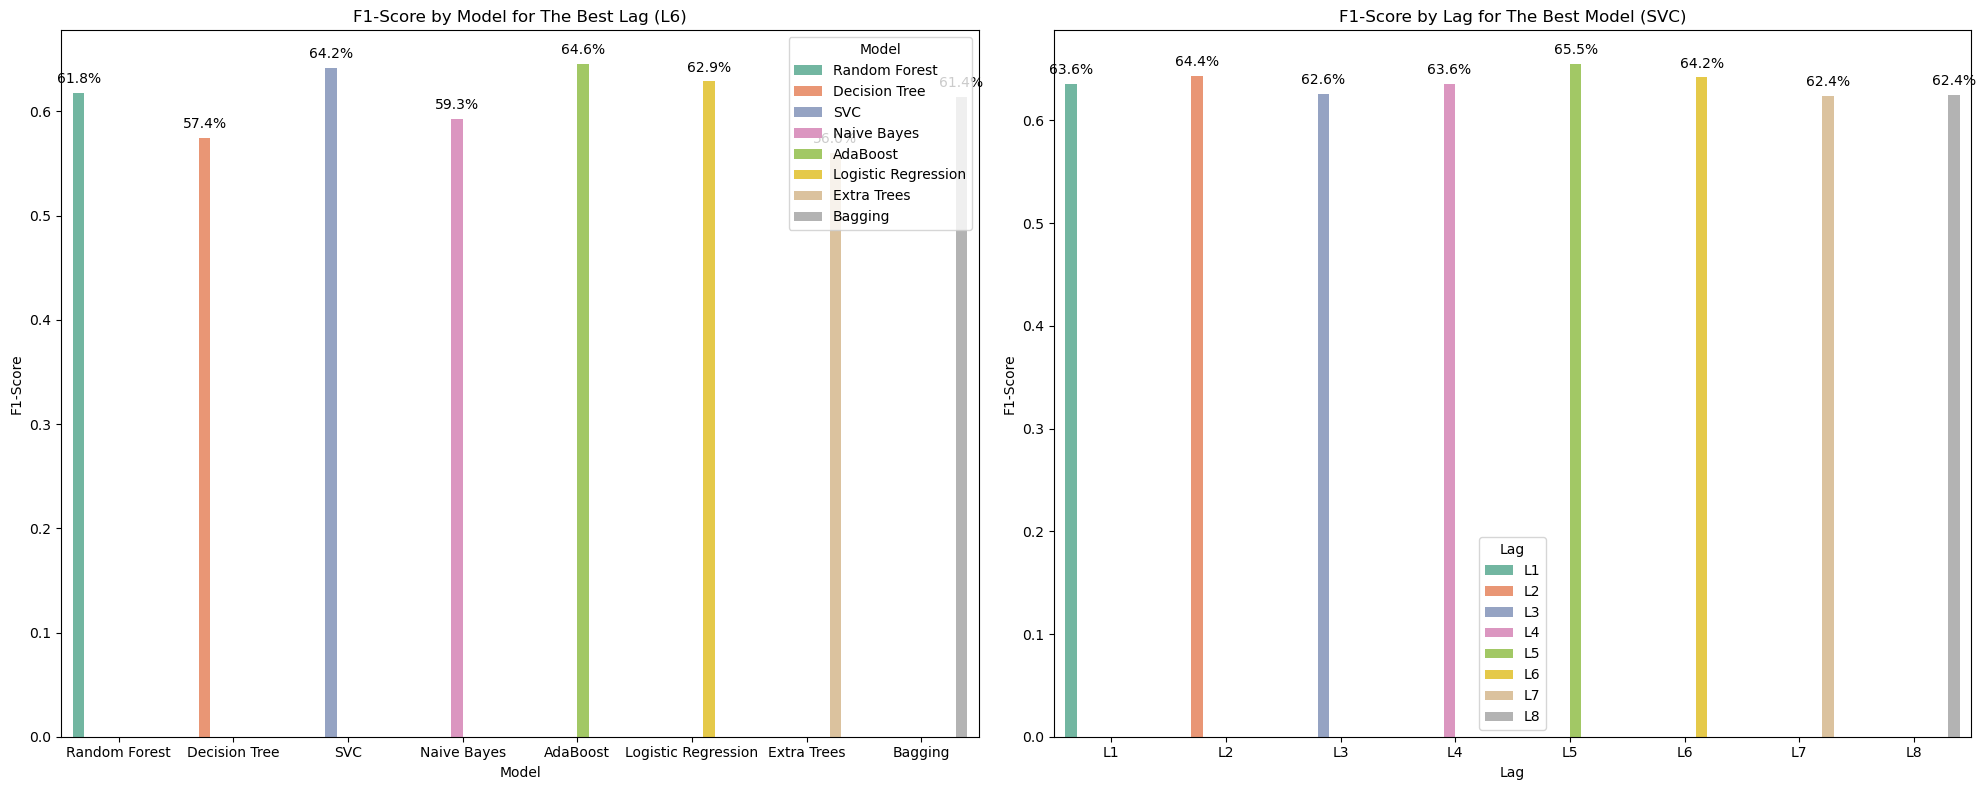

In [94]:
## F1-Score

plot_best_lag_and_model_performance(metrics_df, "F1-Score")

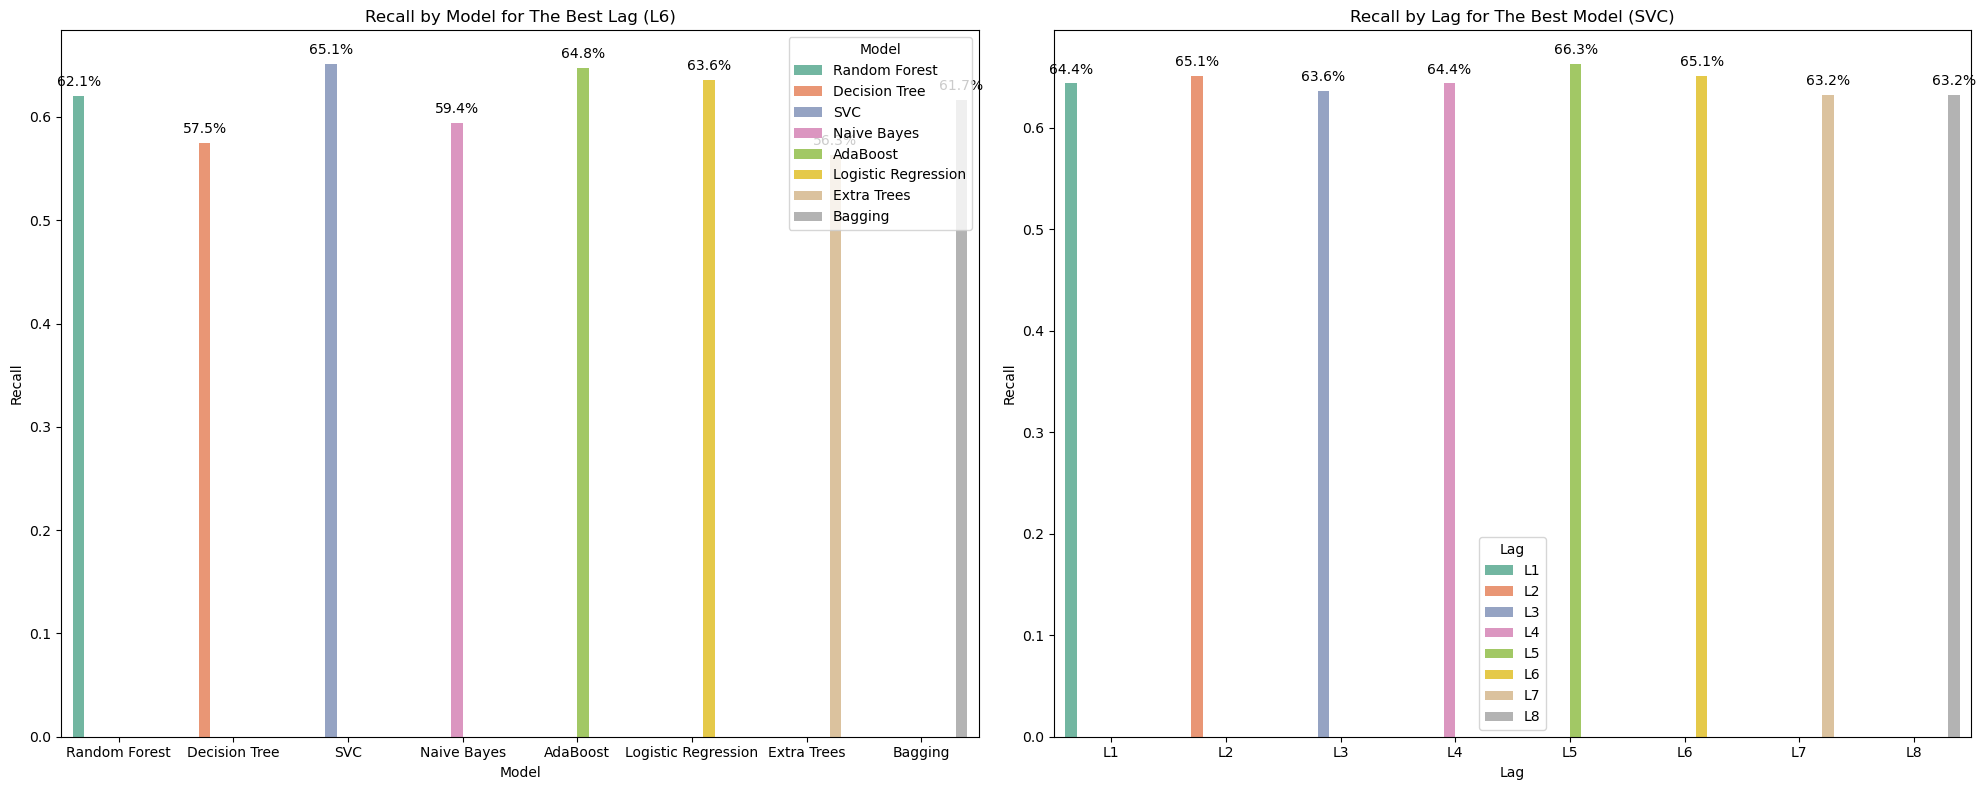

In [95]:
# Recall
plot_best_lag_and_model_performance(metrics_df, "Recall")

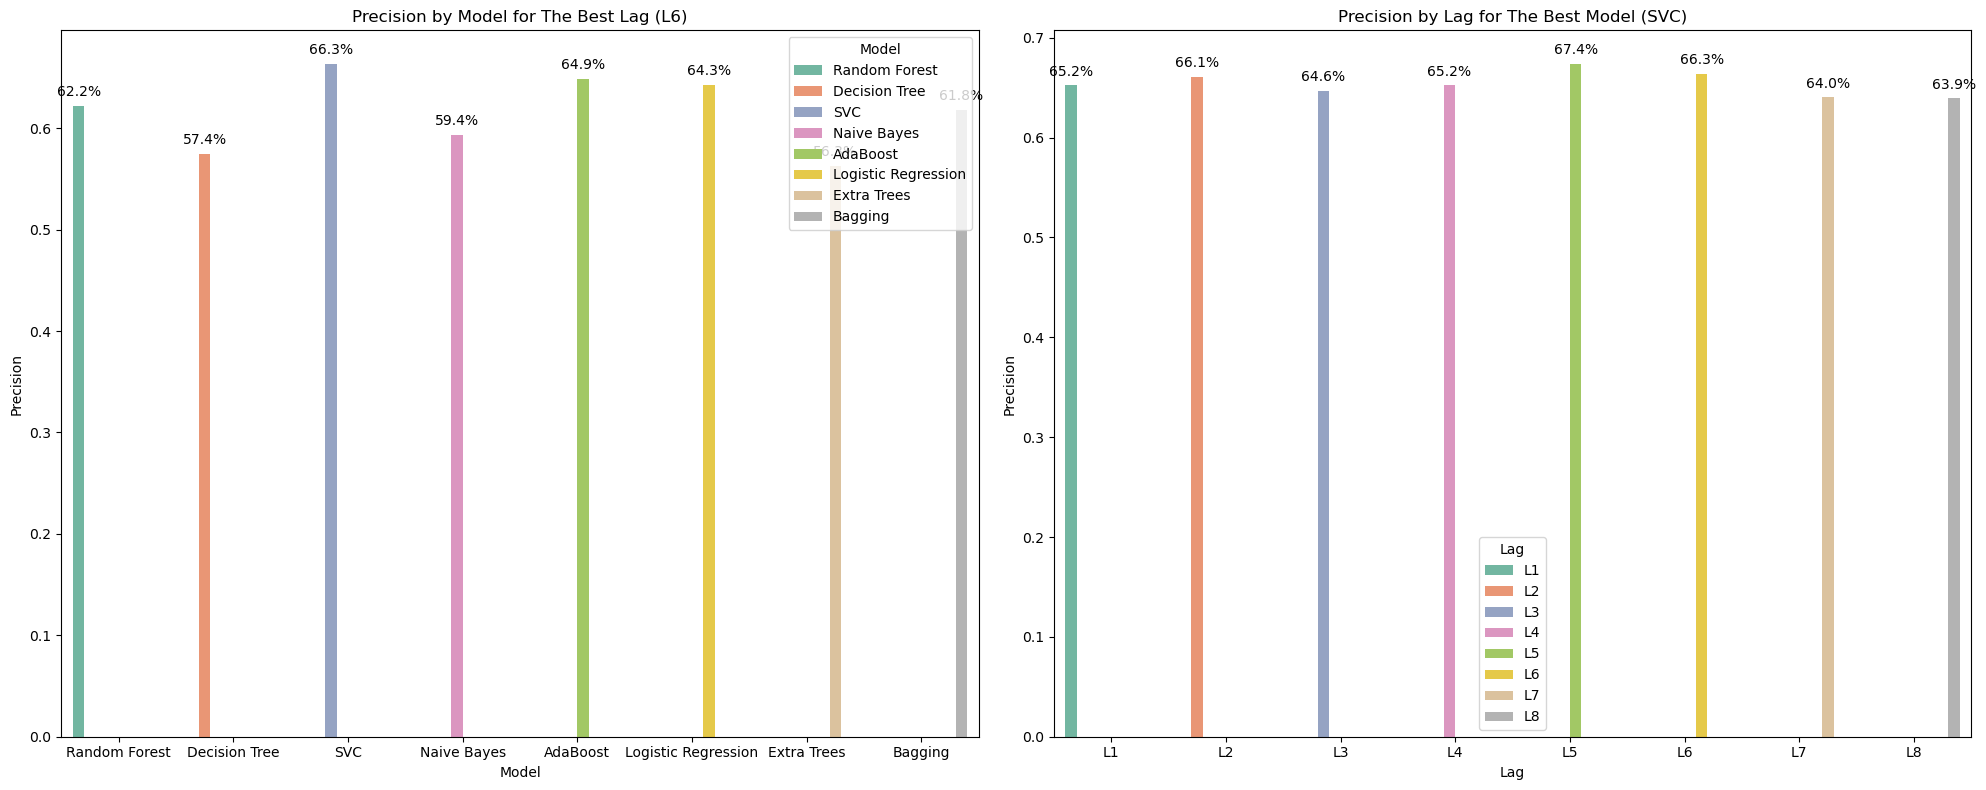

In [96]:
# Precision
plot_best_lag_and_model_performance(metrics_df, "Precision")

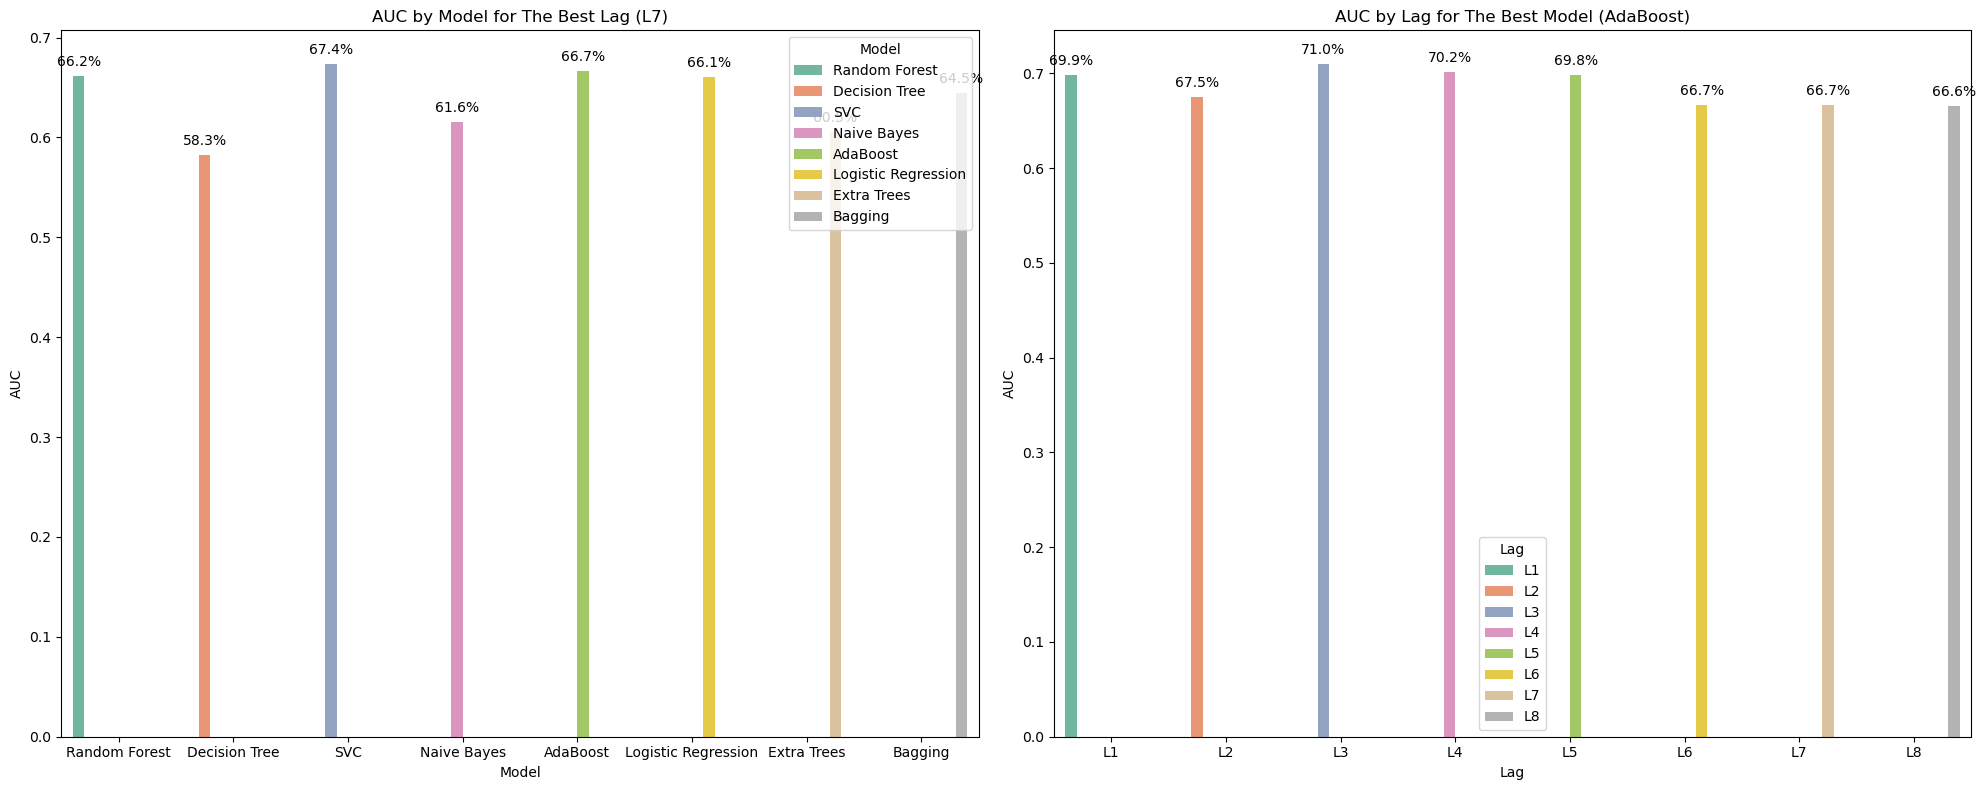

In [97]:
# AUC
plot_best_lag_and_model_performance(metrics_df, "AUC")

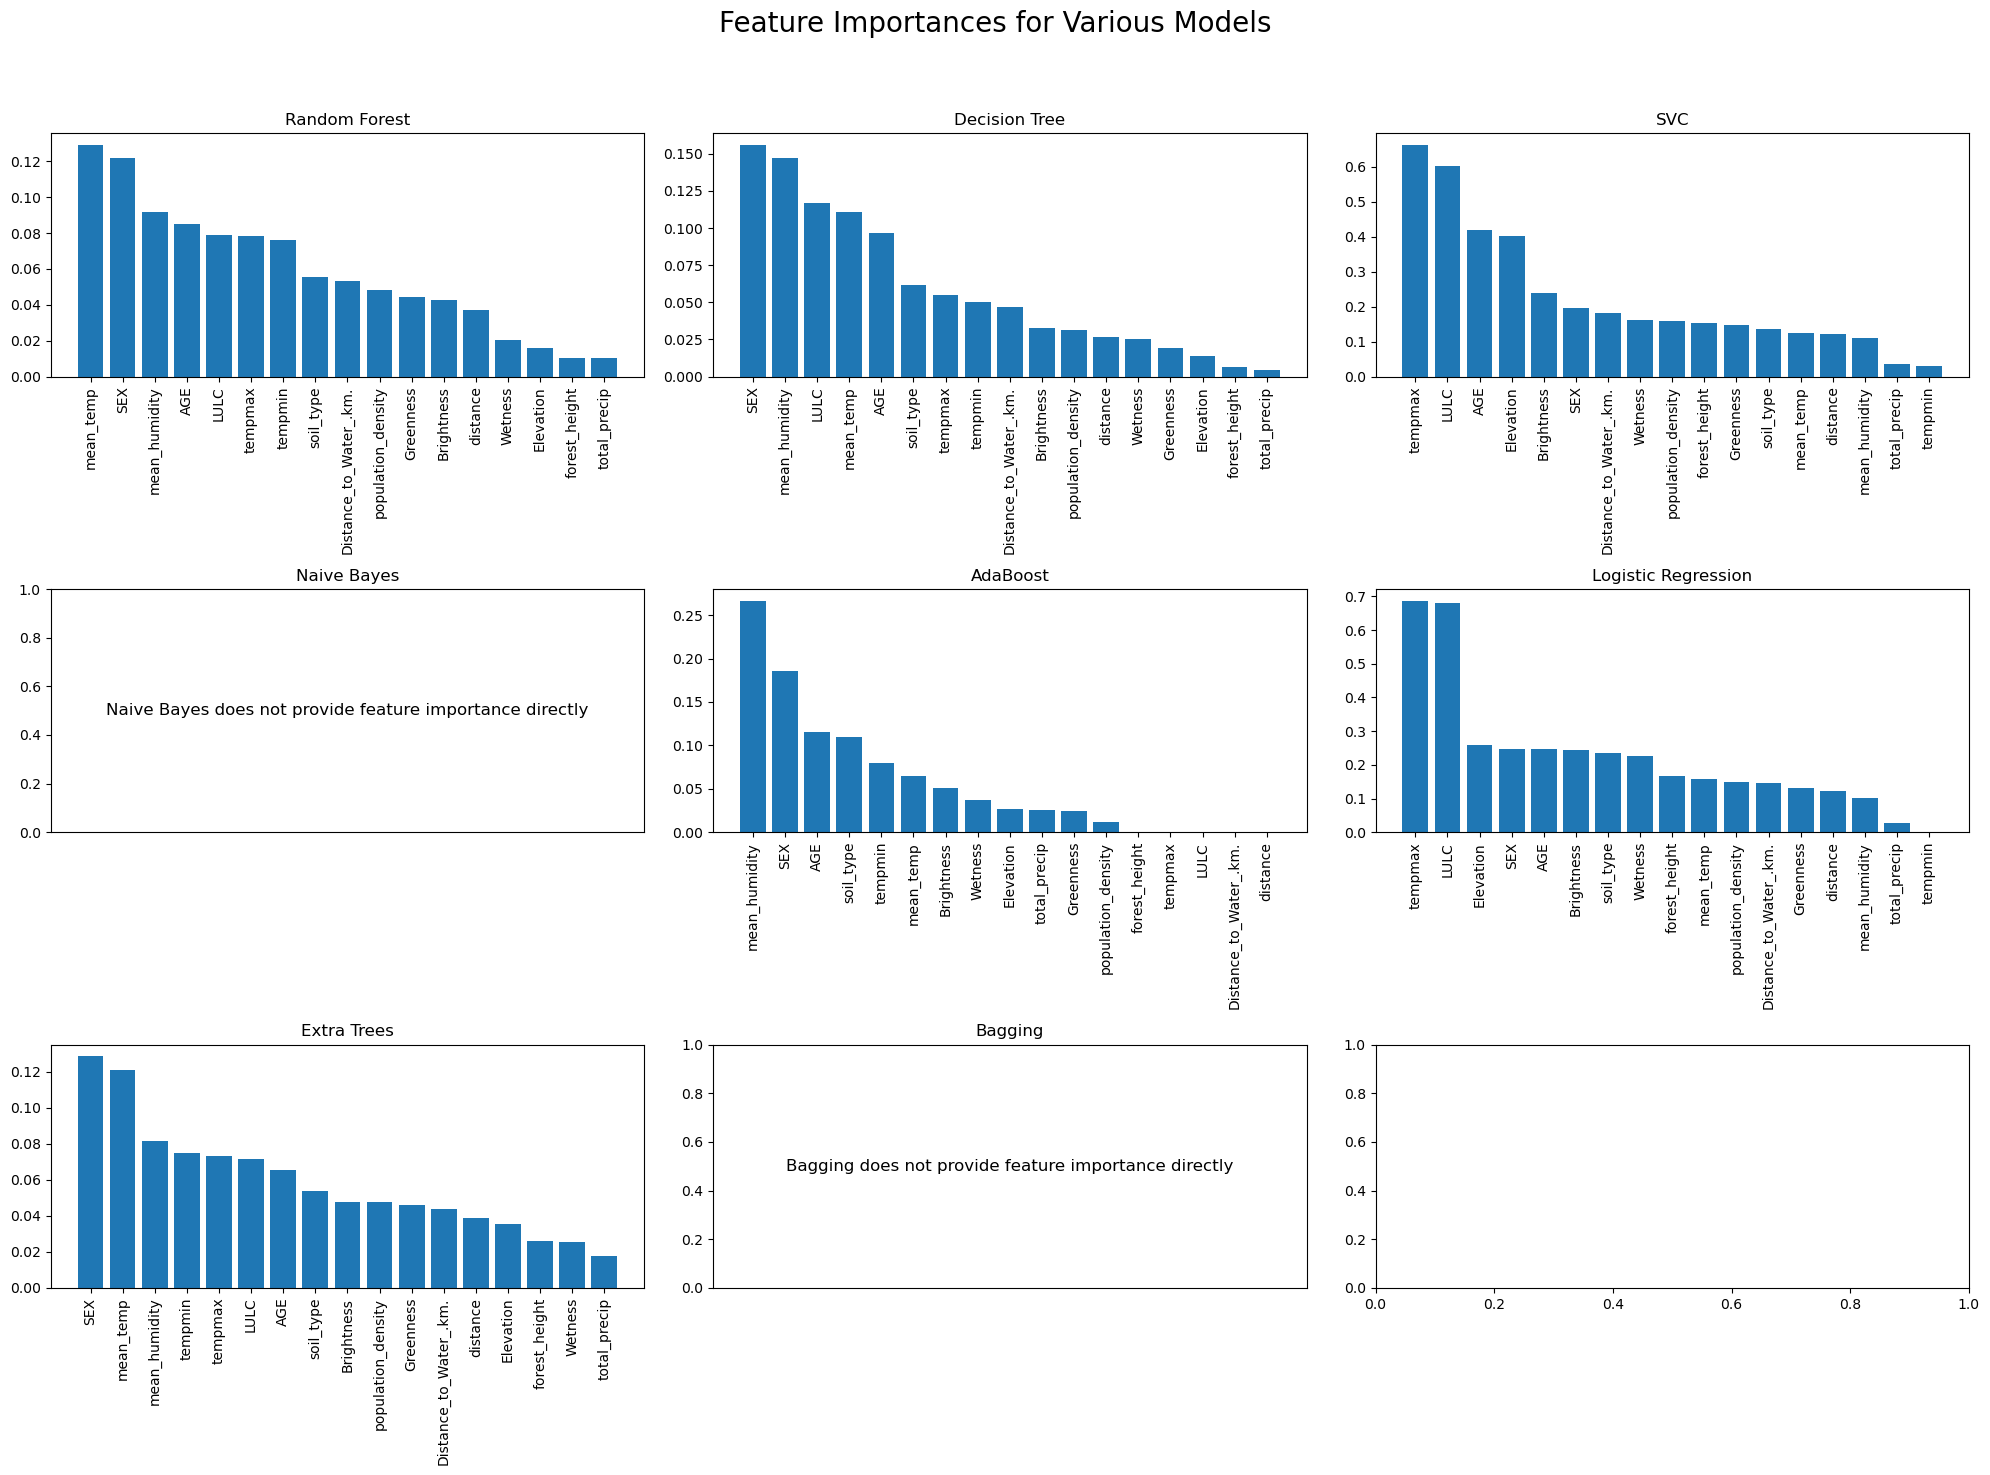

In [98]:
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle("Feature Importances for Various Models", fontsize=20)

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Iterate over each model and plot feature importance or coefficients in the subplots
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)

    ax = axs[i]
    ax.set_title(name)

    # Random Forest, Decision Tree, Extra Trees, AdaBoost, Bagging - Feature importance
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        ax.bar(range(X.shape[1]), importances[indices], align="center")
        ax.set_xticks(range(X.shape[1]))
        ax.set_xticklabels(X.columns[indices], rotation=90)

    # Logistic Regression - Coefficients as feature importance
    elif isinstance(model, LogisticRegression):
        importances = np.abs(model.coef_[0])
        indices = np.argsort(importances)[::-1]
        ax.bar(range(X.shape[1]), importances[indices], align="center")
        ax.set_xticks(range(X.shape[1]))
        ax.set_xticklabels(X.columns[indices], rotation=90)

    # SVC (with linear kernel) - Coefficients as feature importance
    elif isinstance(model, SVC):
        importances = np.abs(model.coef_[0])
        indices = np.argsort(importances)[::-1]
        ax.bar(range(X.shape[1]), importances[indices], align="center")
        ax.set_xticks(range(X.shape[1]))
        ax.set_xticklabels(X.columns[indices], rotation=90)

    # For models without feature importance (e.g., Naive Bayes, QDA)
    else:
        ax.text(
            0.5,
            0.5,
            f"{name} does not provide feature importance directly",
            horizontalalignment="center",
            verticalalignment="center",
            fontsize=12,
        )
        ax.set_xticks([])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# <span style="color:blue">**HyperParamter Tuning**</span>


In [100]:
# Import required libraries
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    BaggingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [101]:
# Define hyperparameter grids
param_grids = {
    "Random Forest": {"n_estimators": [10, 20, 40, 80, 160, 320, 640], "max_depth": [None, 5, 10, 15, 20]},
    "Decision Tree": {"max_depth": [None, 5, 10, 15, 20]},
    "SVC": {"C": [0.5, 1, 1.5], "kernel": ["rbf","sigmoid"]},
    "Naive Bayes": {},  # No hyperparameters for GaussianNB
    "AdaBoost": {"n_estimators": [10, 20, 40, 80, 160, 320, 640], "learning_rate": [0.1, 0.2, 0.3, 0.4,0.5]},
    "Logistic Regression": {"C": [0.5, 1, 1.5]},
    "Extra Trees": {"n_estimators": [10, 20, 40, 80, 160, 320, 640], "max_depth": [None, 5, 10, 15, 20]},
    "Bagging": {"n_estimators": [10, 20, 40, 80, 160, 320, 640], "max_samples": [0.5, 0.75, 1.0]},
}


# Define models with default parameters
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVC": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME"),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging": BaggingClassifier(DecisionTreeClassifier()),
}


In [102]:
# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    auc = roc_auc_score(y_test, y_prob)

    return accuracy, precision, recall, f1, auc


In [103]:
# Feature selection
features = [
    "SEX",
    "AGE",
    "distance",
    "population_density",
    "Distance_to_Water_.km.",
    "Elevation",
    "LULC",
    "tempmax",
    "tempmin",
    "mean_temp",
    "mean_humidity",
    "total_precip",
    "forest_height",
    "soil_type",
    "Greenness",
    "Brightness",
    "Wetness",
]


In [104]:
print(lags.keys())  


dict_keys(['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8'])


In [105]:
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

# Set global random seeds
np.random.seed(42)
random.seed(42)
os.environ["PYTHONHASHSEED"] = "42"

# Sort lags to ensure consistent processing order
sorted_lag_keys = sorted(lags.keys())  # Ensures lags are processed in a fixed order

# Initialize scaler
scaler = StandardScaler()
metrics_data = []

# Loop through each lag in sorted order
for lag_name in sorted_lag_keys:
    lag_data = lags[lag_name]
    X = lag_data[features]
    y = lag_data["Infections"]

    # One-hot encode categorical variables
    X_encoded = pd.get_dummies(X, drop_first=True)

    # Split the data before scaling
    X_train, X_test, y_train, y_test = train_test_split(
        X_encoded, y, test_size=0.2, random_state=42  # Fixed random state
    )

    # Fit scaler on training data only
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train models with hyperparameter tuning
    for model_name, model in models.items():
        param_grid = param_grids.get(model_name, {})

        # Ensure models with randomness have fixed random_state
        if hasattr(model, "random_state"):
            model.set_params(random_state=42)

        if param_grid:  # Apply GridSearch if hyperparameters exist
            cv_strategy = KFold(n_splits=3, shuffle=True, random_state=42)  # Fixed CV
            grid_search = GridSearchCV(model, param_grid, cv=cv_strategy, scoring="accuracy")
            grid_search.fit(X_train_scaled, y_train)
            best_model = grid_search.best_estimator_
        else:
            best_model = model.fit(X_train_scaled, y_train)

        # Re-ensure random state consistency
        if hasattr(best_model, "random_state"):
            best_model.set_params(random_state=42)

        # Evaluate model
        accuracy, precision, recall, f1, auc = evaluate_model(best_model, X_test_scaled, y_test)

        # Store results
        metrics_data.append(
            {
                "Lag": lag_name,
                "Model": model_name,
                "Accuracy": accuracy,
                "Precision": precision,
                "Recall": recall,
                "F1-Score": f1,
                "AUC": auc,
            }
        )

In [106]:
# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_data)


In [107]:
# Determine best model and lag per metric
best_results = {
    metric: {
        "Best Lag": metrics_df.loc[metrics_df[metric].idxmax()]["Lag"],
        "Best Model": metrics_df.loc[metrics_df[metric].idxmax()]["Model"],
    }
    for metric in ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]
}

# Display best results
print(pd.DataFrame(best_results))


           Accuracy Precision   Recall F1-Score       AUC
Best Lag         L1        L1       L1       L1        L4
Best Model  Bagging   Bagging  Bagging  Bagging  AdaBoost


In [108]:
def plot_best_lag_and_model_performance(df, metric):
    # Determine the best lag based on the single highest score
    best_lag = df.loc[df[metric].idxmax()]["Lag"]
    best_lag_df = df[df["Lag"] == best_lag]

    # Determine the best model based on the single highest score
    best_model = df.loc[df[metric].idxmax()]["Model"]
    best_model_df = df[df["Model"] == best_model]

    # Create a figure with 1 row and 2 columns of subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Plot for the best lag
    ax1 = sns.barplot(
        x="Model", y=metric, data=best_lag_df, palette="Set2", ax=axes[0], hue="Model"
    )
    ax1.set_title(f"{metric} by Model for The Best Lag ({best_lag})")

    # Annotate bars
    for p in ax1.patches:
        ax1.annotate(
            f"{p.get_height():.1%}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 10),
            textcoords="offset points",
        )

    # Plot for the best model
    ax2 = sns.barplot(
        x="Lag", y=metric, data=best_model_df, palette="Set2", ax=axes[1], hue="Lag"
    )
    ax2.set_title(f"{metric} by Lag for The Best Model ({best_model})")

    # Annotate bars
    for p in ax2.patches:
        ax2.annotate(
            f"{p.get_height():.1%}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 10),
            textcoords="offset points",
        )

    plt.tight_layout()
    plt.show()



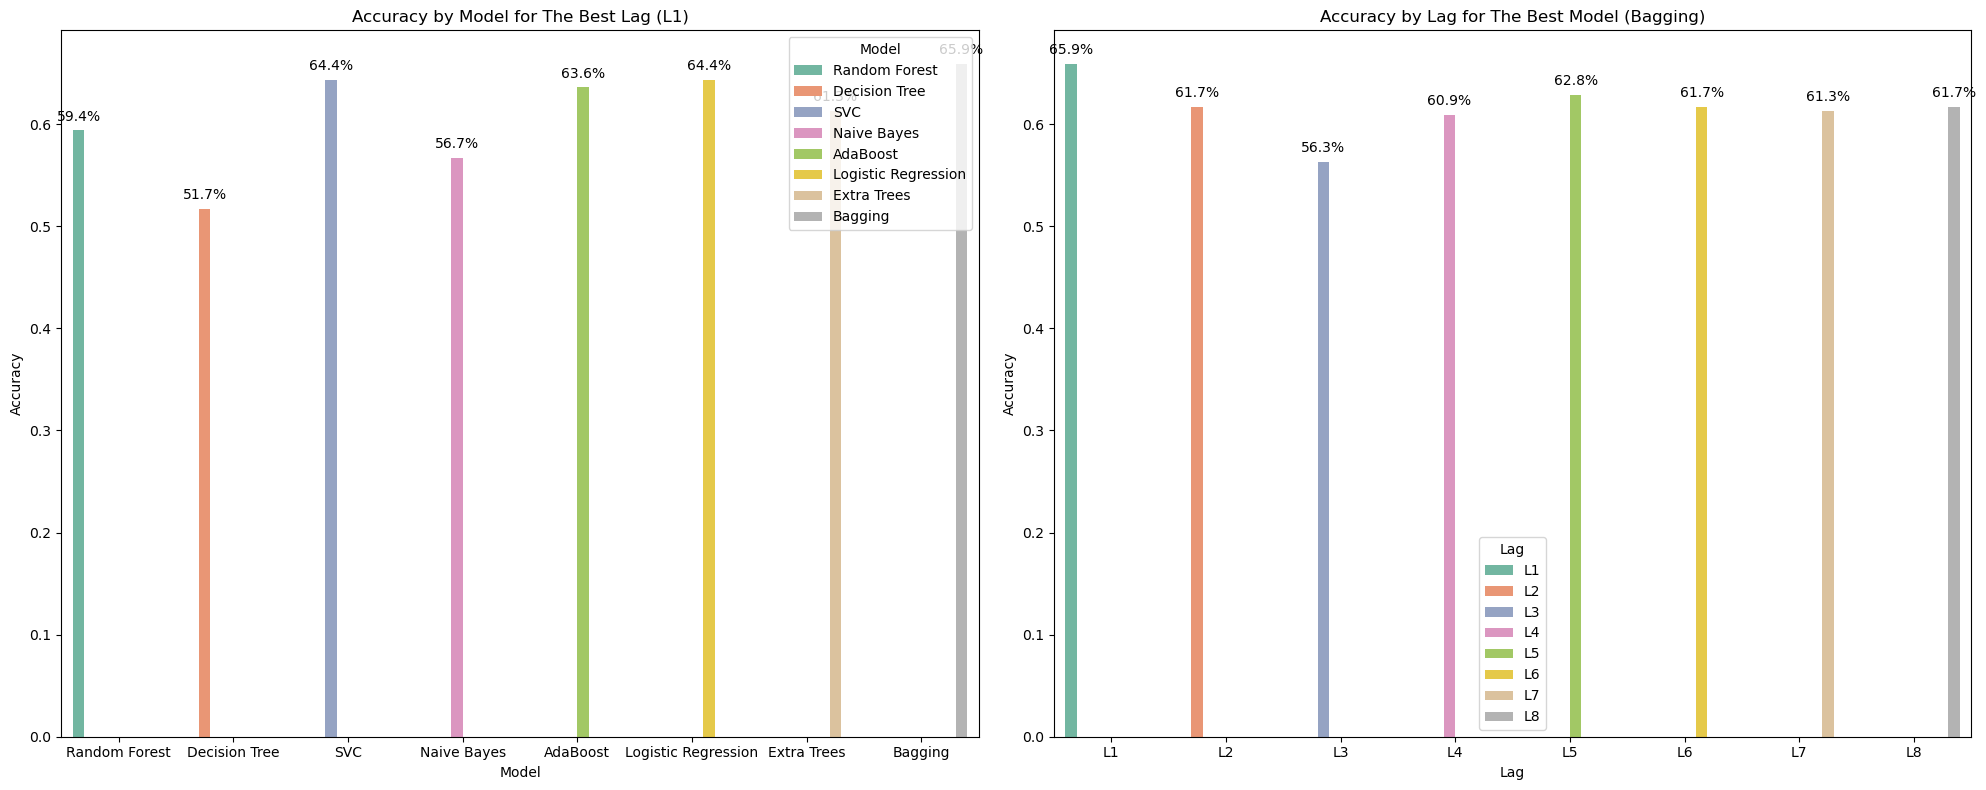

In [109]:
plot_best_lag_and_model_performance(metrics_df, "Accuracy")


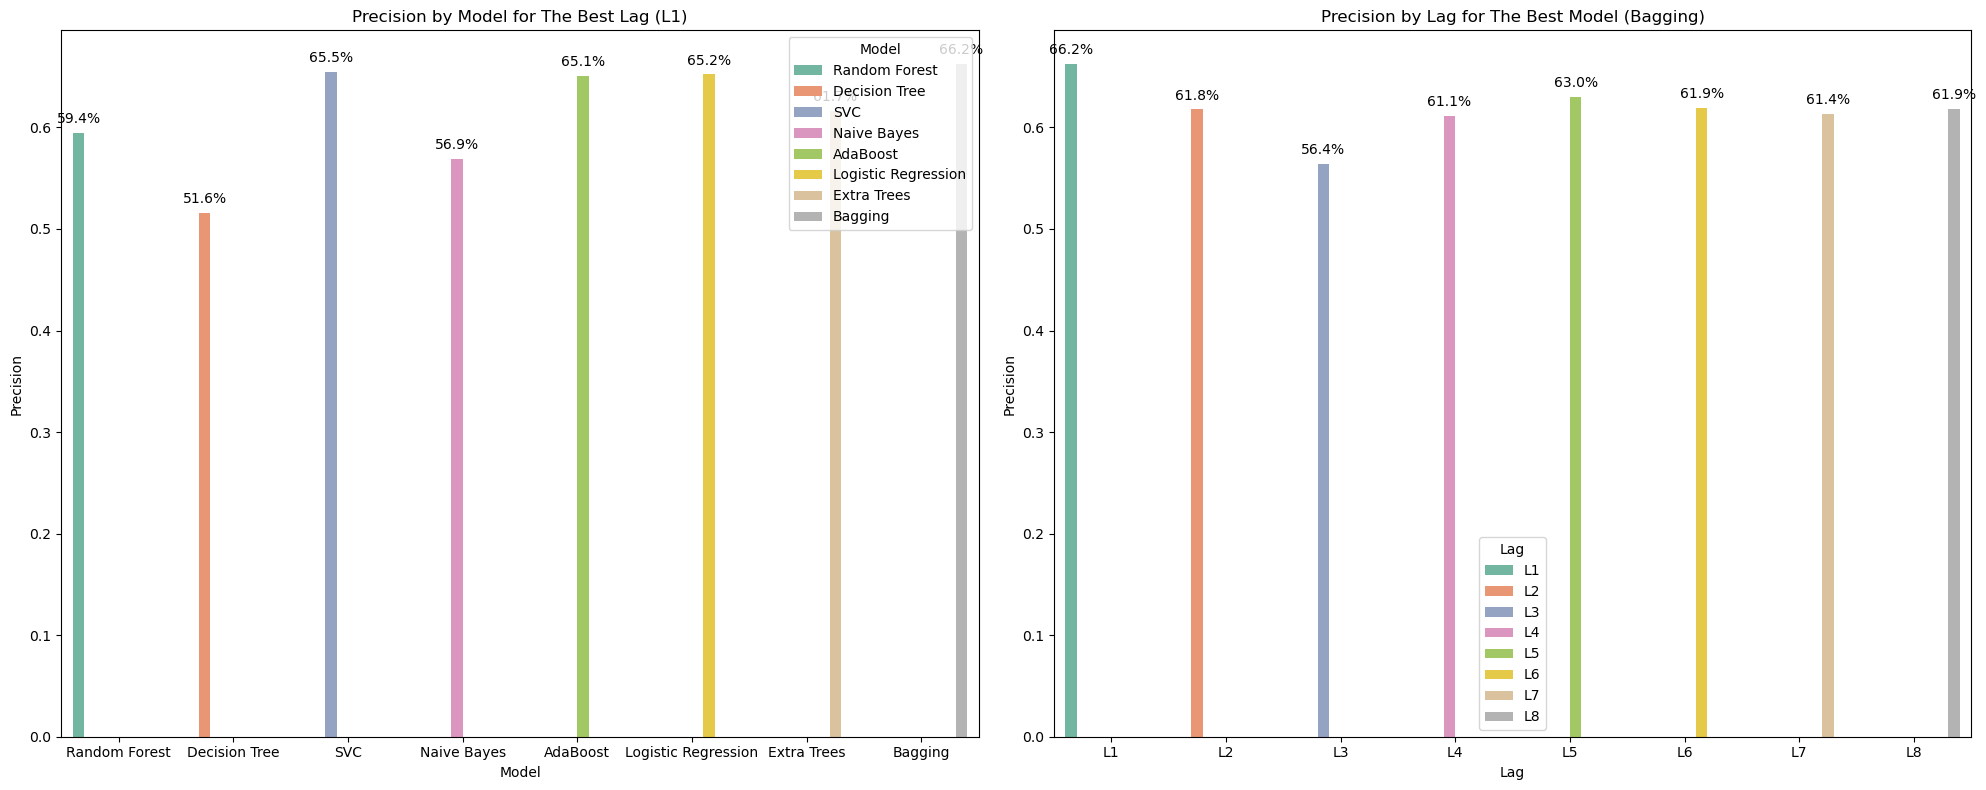

In [110]:
plot_best_lag_and_model_performance(metrics_df, "Precision")

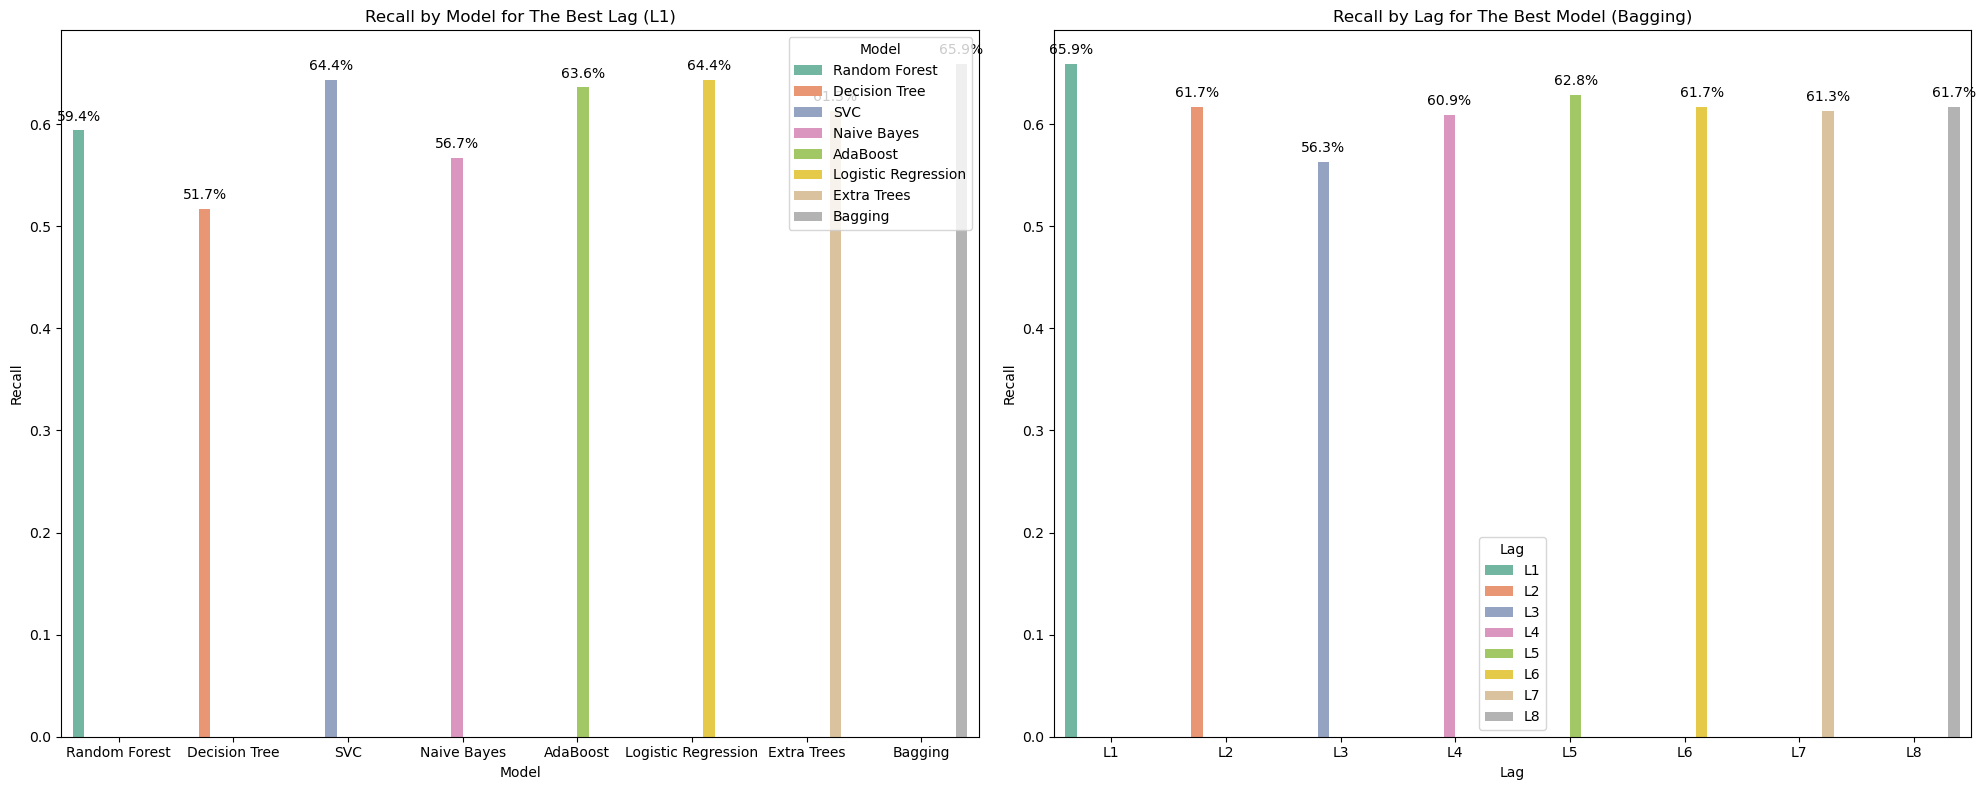

In [111]:
plot_best_lag_and_model_performance(metrics_df, "Recall")

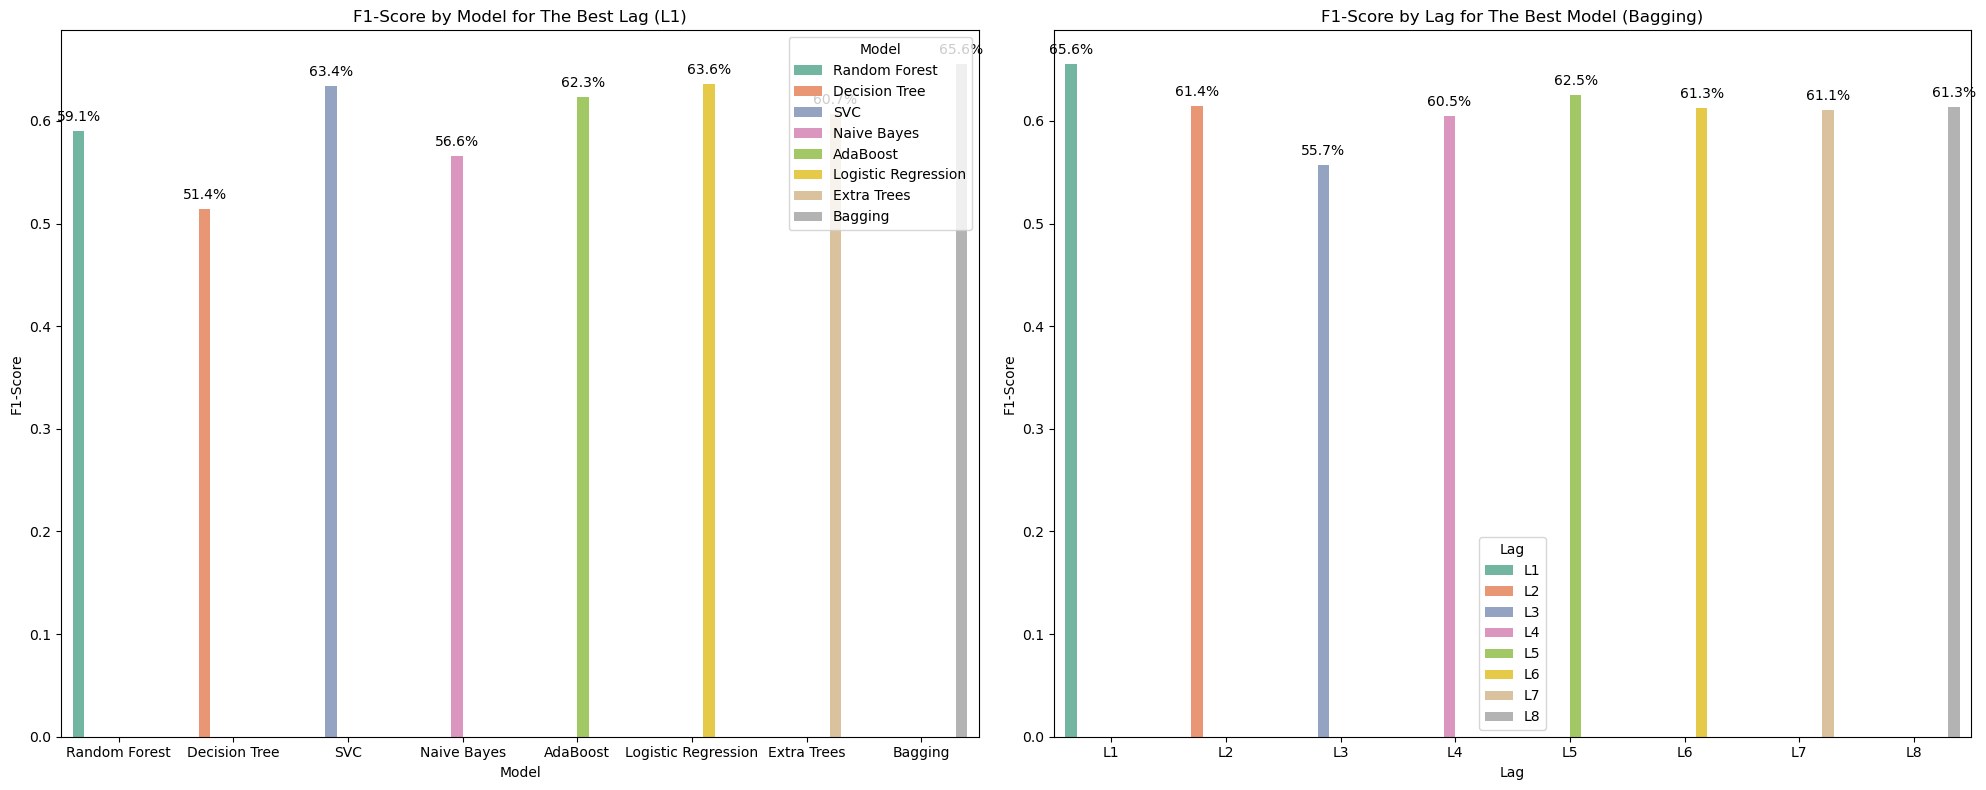

In [112]:
plot_best_lag_and_model_performance(metrics_df, "F1-Score")

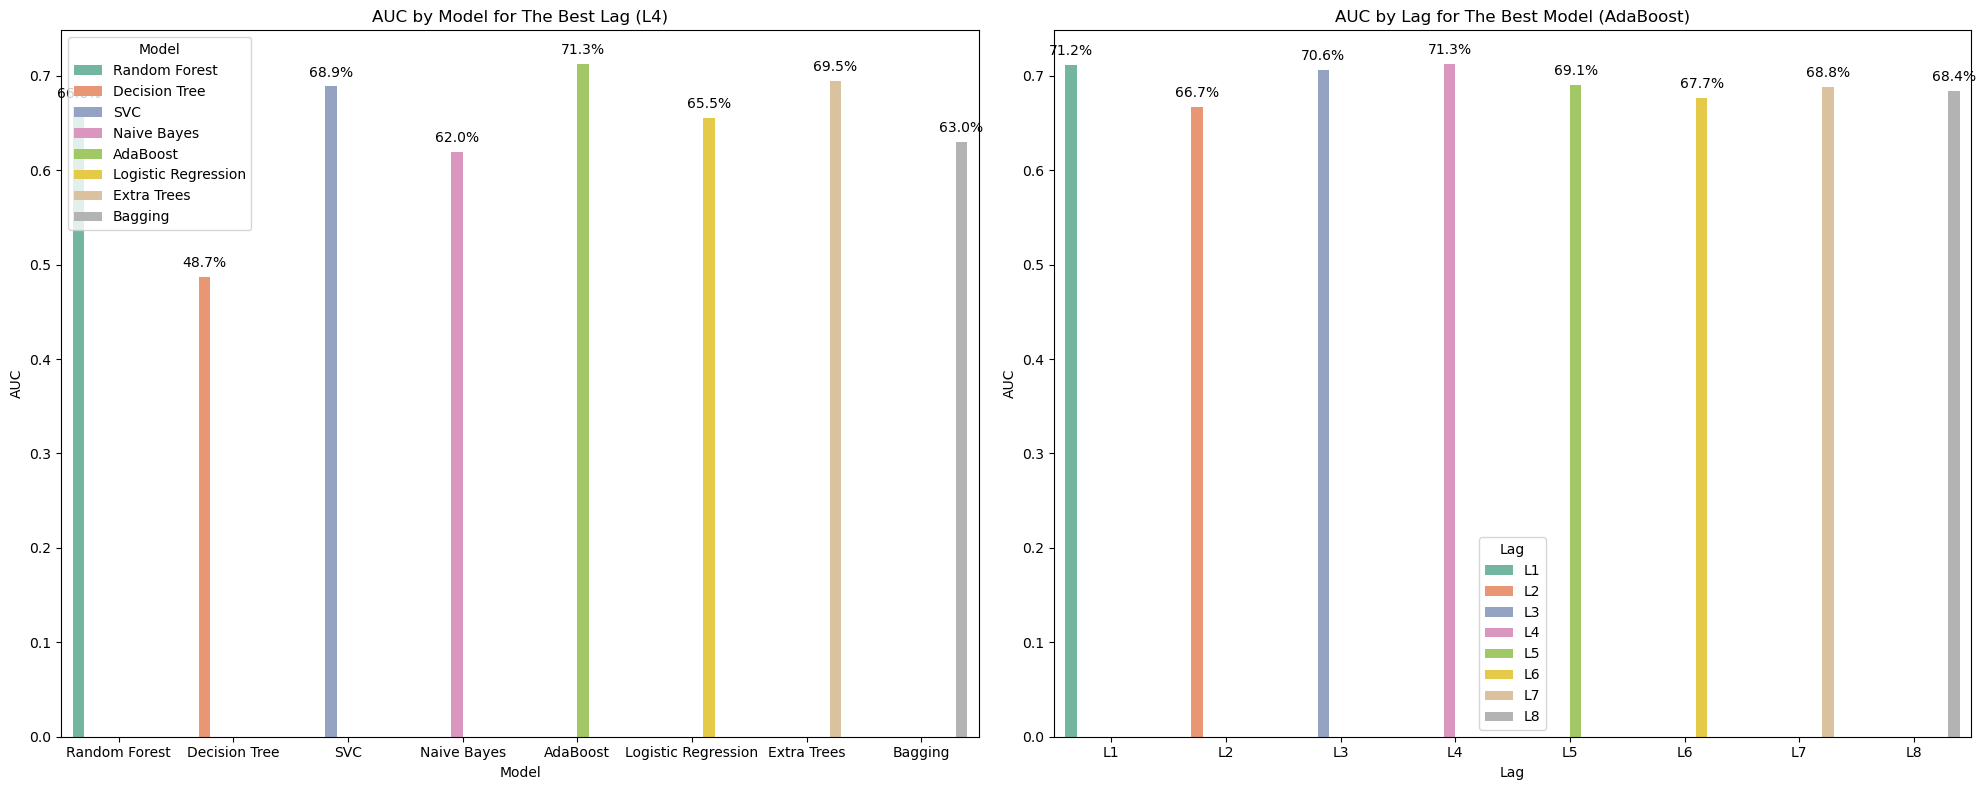

In [113]:
plot_best_lag_and_model_performance(metrics_df, "AUC")

In [114]:
# Pivot the DataFrame to show performance metrics for each model across lags
performance_table = metrics_df.pivot_table(
    index=["Lag"], 
    columns=["Model"], 
    values=["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]
)

# Display the table
print(performance_table)

            AUC                                                          \
Model  AdaBoost   Bagging Decision Tree Extra Trees Logistic Regression   
Lag                                                                       
L1     0.711599  0.666765      0.517599    0.664238            0.676460   
L2     0.666912  0.663063      0.513016    0.687889            0.663239   
L3     0.706223  0.600306      0.523123    0.690857            0.665002   
L4     0.712569  0.630450      0.487073    0.695029            0.655247   
L5     0.690739  0.670613      0.607621    0.702668            0.657304   
L6     0.676960  0.666118      0.574509    0.686156            0.657304   
L7     0.688212  0.660418      0.593901    0.688653            0.660830   
L8     0.684305  0.659155      0.569544    0.696322            0.664120   

                                           Accuracy            ...  \
Model Naive Bayes Random Forest       SVC  AdaBoost   Bagging  ...   
Lag                               

In [115]:

performance_table.to_csv("model_performance_across_lags.csv")

<span style="color:blue; font-weight:bold; font-size:16px;">Seven Best Models based on Performance Metrics</span>

In [116]:
# Identify the seven best models based on Accuracy
best_models_df = metrics_df.nlargest(7, 'Accuracy')
print("Top 5 models based on Accuracy:\n", best_models_df[['Model', 'Lag', 'Accuracy']])

Top 5 models based on Accuracy:
                   Model Lag  Accuracy
7               Bagging  L1  0.659004
28             AdaBoost  L4  0.647510
52             AdaBoost  L7  0.647510
60             AdaBoost  L8  0.647510
2                   SVC  L1  0.643678
5   Logistic Regression  L1  0.643678
10                  SVC  L2  0.643678


In [117]:
# Identify the seven best models based on Precision
best_models_df = metrics_df.nlargest(7, 'Precision')
print("Top 5 models based on Precision:\n", best_models_df[['Model', 'Lag', 'Precision']])

Top 5 models based on Precision:
           Model Lag  Precision
7       Bagging  L1   0.662474
62  Extra Trees  L8   0.660075
46  Extra Trees  L6   0.658746
38  Extra Trees  L5   0.657568
60     AdaBoost  L8   0.656996
14  Extra Trees  L2   0.655204
2           SVC  L1   0.654838


In [118]:
# Identify the seven best models based on Recall
best_models_df = metrics_df.nlargest(7, 'Recall')
print("Top 5 models based on Recall:\n", best_models_df[['Model', 'Lag', 'Recall']])

Top 5 models based on Recall:
                   Model Lag    Recall
7               Bagging  L1  0.659004
28             AdaBoost  L4  0.647510
52             AdaBoost  L7  0.647510
60             AdaBoost  L8  0.647510
2                   SVC  L1  0.643678
5   Logistic Regression  L1  0.643678
10                  SVC  L2  0.643678


In [119]:
# Identify the seven best models based on F1-Score
best_models_df = metrics_df.nlargest(7, 'F1-Score')
print("Top 5 models based on F1-Score:\n", best_models_df[['Model', 'Lag', 'F1-Score']])

Top 5 models based on F1-Score:
             Model Lag  F1-Score
7         Bagging  L1  0.655504
28       AdaBoost  L4  0.642998
52       AdaBoost  L7  0.641648
60       AdaBoost  L8  0.639276
20       AdaBoost  L3  0.636608
24  Random Forest  L4  0.636431
32  Random Forest  L5  0.635857


In [120]:
# Identify the seven best models based on AUC
best_models_df = metrics_df.nlargest(7, 'AUC')
print("Top 5 models based on AUC:\n", best_models_df[['Model', 'Lag', 'AUC']])

Top 5 models based on AUC:
           Model Lag       AUC
28     AdaBoost  L4  0.712569
4      AdaBoost  L1  0.711599
20     AdaBoost  L3  0.706223
38  Extra Trees  L5  0.702668
58          SVC  L8  0.700964
62  Extra Trees  L8  0.696322
30  Extra Trees  L4  0.695029


<span style="color:blue; font-weight:bold; font-size:16px;">Shap Summary Plot and Feature Importance Plot</span>

PermutationExplainer explainer: 262it [00:53,  3.94it/s]                                                               


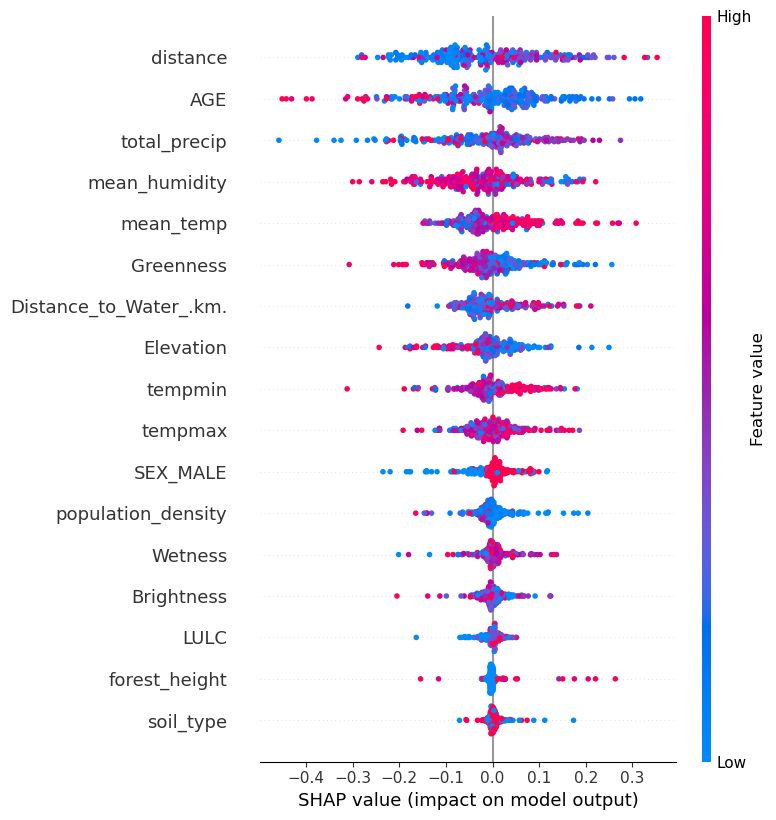

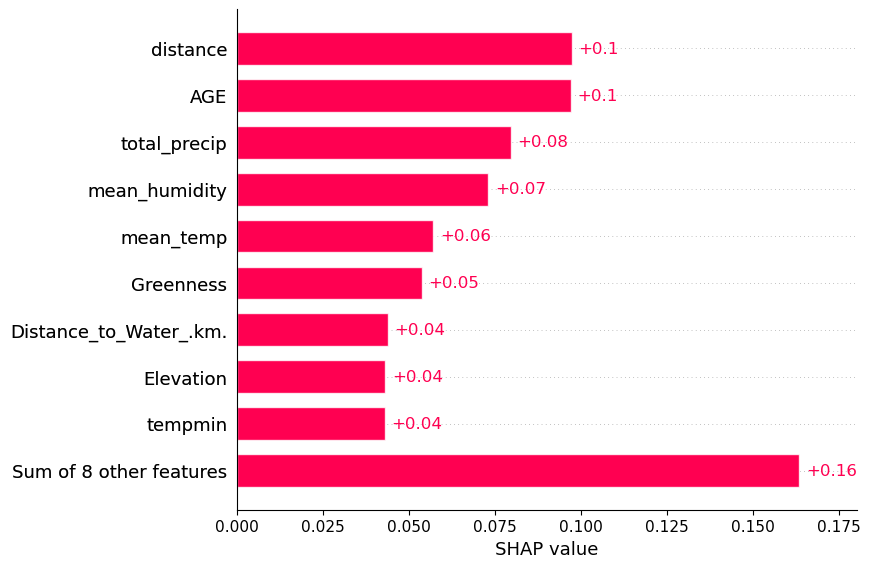

In [179]:
import shap
import numpy as np

#  Train Bagging model on scaled data
bagging_model = models["Bagging"].fit(X_train_scaled, y_train)

#  Initialize SHAP explainer with scaled data
explainer_bagging = shap.Explainer(bagging_model.predict, X_train_scaled)

#  Compute SHAP values on scaled X_test
shap_values_bagging = explainer_bagging(X_test_scaled)

#  SHAP Summary Plot
shap.summary_plot(shap_values_bagging, X_test_scaled, feature_names=X_encoded.columns, title="Bagging Classifier SHAP")

#  Feature Importance Bar Plot with Correct Feature Names
shap_values_bagging_abs = np.abs(shap_values_bagging.values).mean(axis=0)  # Compute mean absolute SHAP values
shap_values_bagging_exp = shap.Explanation(values=shap_values_bagging_abs, feature_names=X_encoded.columns)  # Assign feature names

# Generate SHAP Feature Importance Bar Plot
shap.plots.bar(shap_values_bagging_exp)





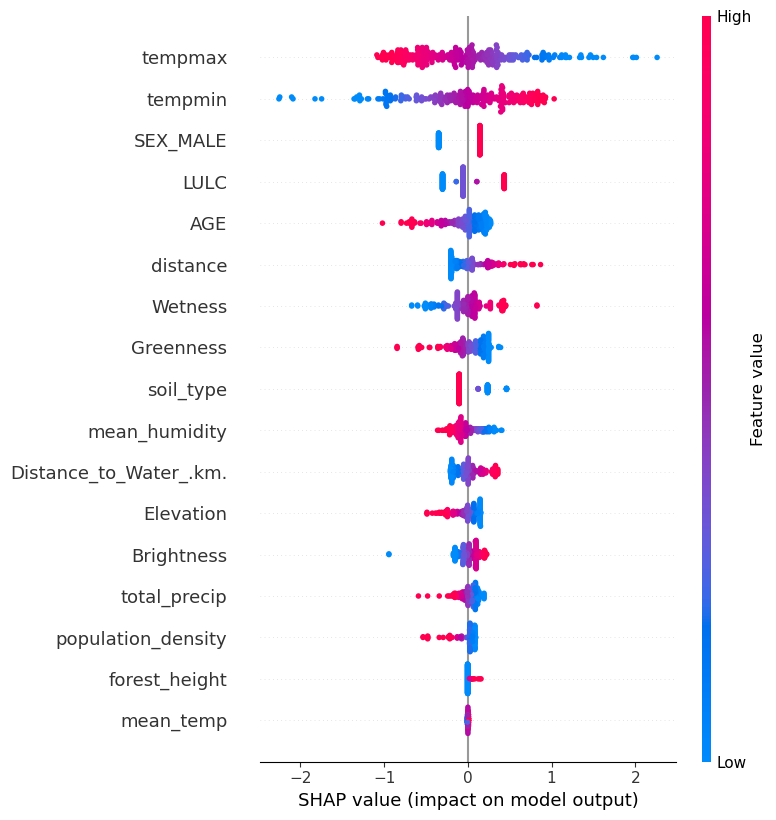

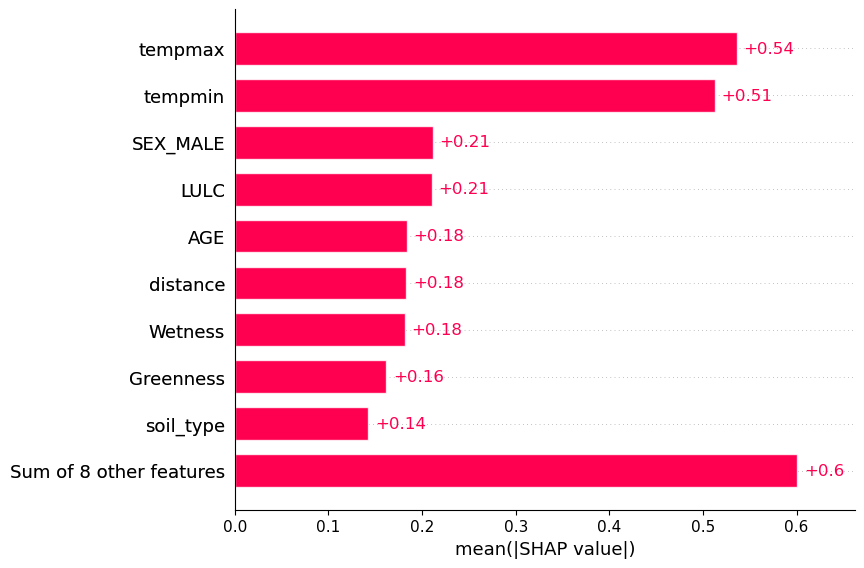

In [182]:


# Train Logistic Regression
logistic_model = models["Logistic Regression"].fit(X_train_scaled, y_train)

# Use SHAP Explainer for Logistic Regression
explainer_logistic = shap.Explainer(logistic_model, X_train_scaled)
shap_values_logistic = explainer_logistic(X_test_scaled)

# SHAP Summary Plot
shap.summary_plot(shap_values_logistic, X_test_scaled, feature_names=X_encoded.columns, title="Logistic Regression SHAP")

#  Feature Importance Bar Plot 
shap_values_logistic_abs = np.abs(shap_values_logistic.values).mean(axis=0)  # Compute mean absolute SHAP values
shap_values_logistic_exp = shap.Explanation(values=shap_values_logistic, feature_names=X_encoded.columns)  # Assign feature names

# Generate SHAP Feature Importance Bar Plot
shap.plots.bar(shap_values_logistic_exp)




C:\Users\mnzilani\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
C:\Users\mnzilani\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
C:\Users\mnzilani\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
C:\Users\mnzilani\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
C:\Users\mnzilani\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(
C:\Users\mnzilani\AppData\Local\anaconda3\Lib\site-packages\

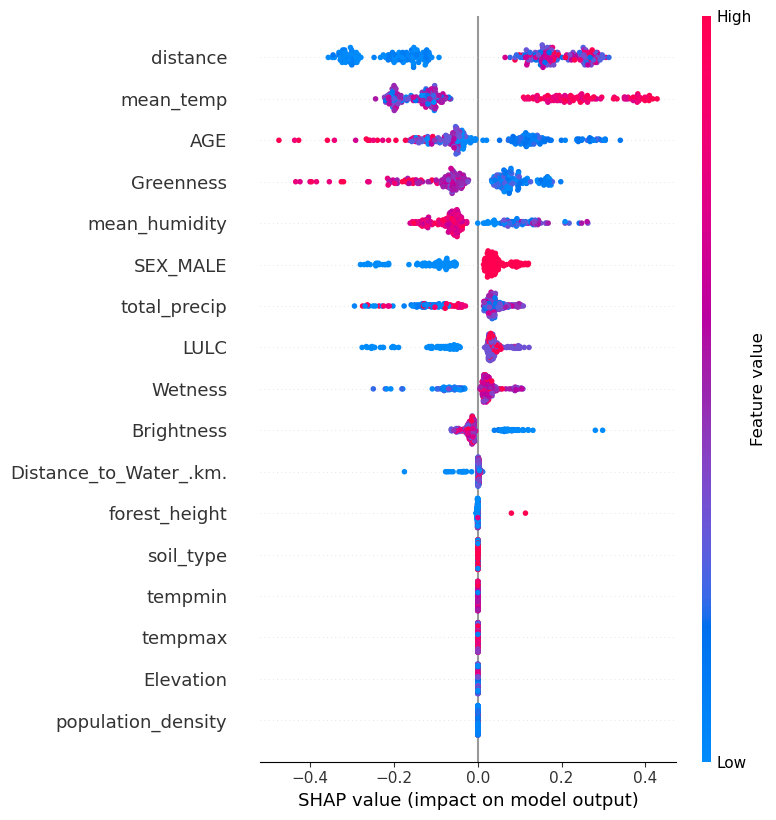

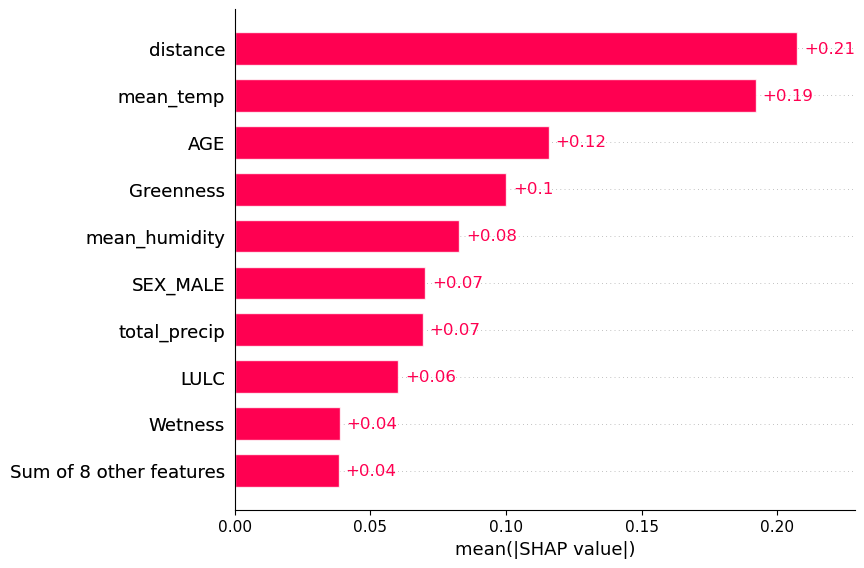

In [183]:

# Train AdaBoost Classifier
adaboost_model = models["AdaBoost"].fit(X_train_scaled, y_train)

# Use SHAP's generic Explainer (supports non-tree-based models)
explainer_adaboost = shap.Explainer(adaboost_model.predict, X_train)
shap_values_adaboost = explainer_adaboost(X_test_scaled)

# SHAP Summary Plot
shap.summary_plot(shap_values_adaboost, X_test_scaled, feature_names=X_encoded.columns, title="AdaBoost SHAP")

#  Feature Importance Bar Plot 
shap_values_adaboost_abs = np.abs(shap_values_adaboost.values).mean(axis=0)  # Compute mean absolute SHAP values
shap_values_adaboost_exp = shap.Explanation(values=shap_values_adaboost, feature_names=X_encoded.columns)  # Assign feature names

# Generate SHAP Feature Importance Bar Plot
shap.plots.bar(shap_values_adaboost_exp)



  0%|          | 0/261 [00:00<?, ?it/s]

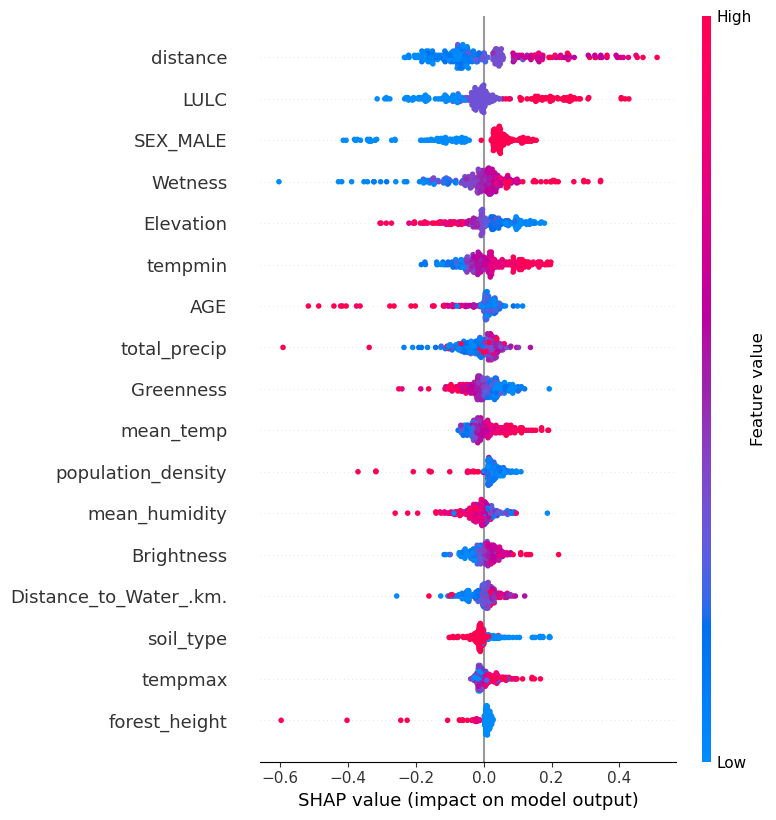

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [185]:

import numpy as np

# Train SVC
svc_model = models["SVC"].fit(X_train_scaled, y_train)

# using smaller sample for the background
background_sample = shap.sample(X_train_scaled, 50)  

# Use KernelExplainer for SVC 
explainer_svc = shap.KernelExplainer(svc_model.predict, background_sample)
shap_values_svc = explainer_svc.shap_values(X_test_scaled)

# SHAP Summary Plot (regular summary plot)
shap.summary_plot(shap_values_svc, X_test_scaled, feature_names=X_encoded.columns, title="SVC SHAP")


#  Feature Importance Bar Plot 
shap_values_svc_abs = np.abs(shap_values_svc.values).mean(axis=0)  # Compute mean absolute SHAP values
shap_values_svc_exp = shap.Explanation(values=shap_values_svc, feature_names=X_encoded.columns)  # Assign feature names

# Generate SHAP Feature Importance Bar Plot
shap.plots.bar(shap_values_svc_exp)

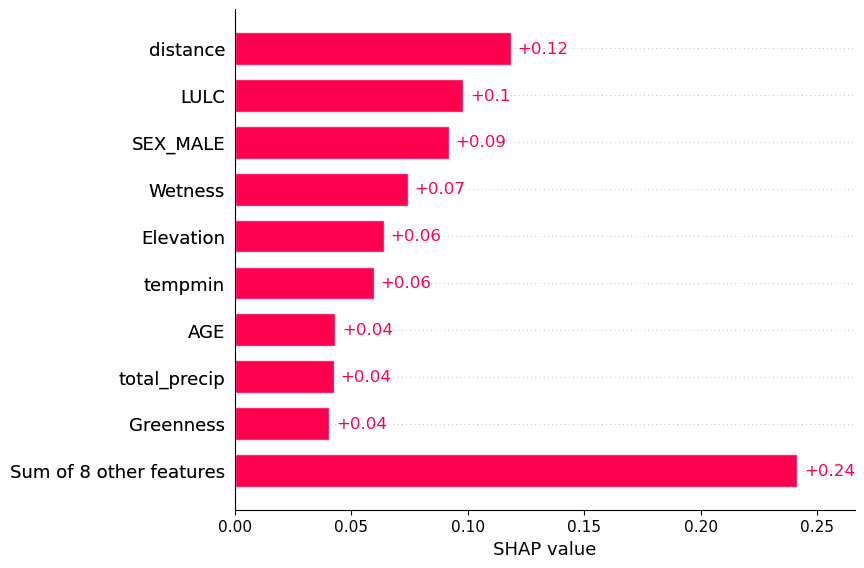

In [186]:
## Feature Importance plot for SVC

# Compute mean absolute SHAP values
shap_values_svc_abs = np.abs(shap_values_svc).mean(axis=0)

# Create SHAP Explanation object
shap_values_svc_exp = shap.Explanation(values=shap_values_svc_abs, feature_names=X_encoded.columns)

# Generate SHAP Feature Importance Bar Plot
shap.plots.bar(shap_values_svc_exp)


Original SHAP values shape: (261, 17, 2)
Final SHAP values shape: (261, 17)
X_test shape: (261, 17)


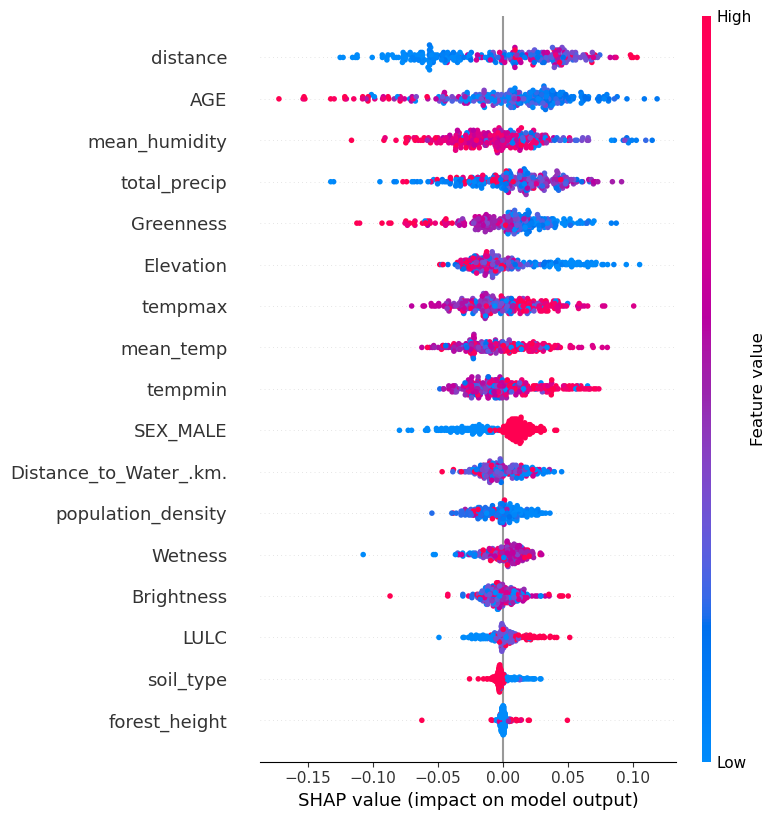

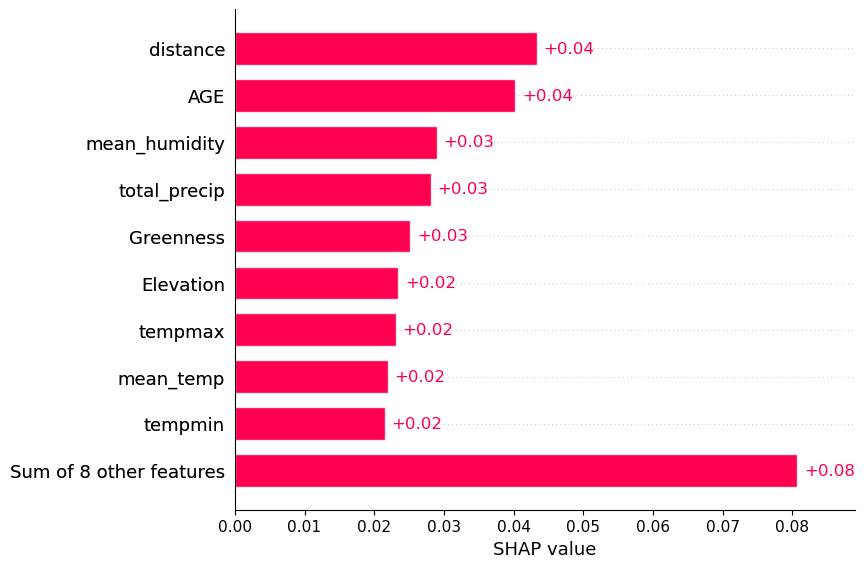

In [184]:

# Train Random Forest model
rf_model = models["Random Forest"].fit(X_train_scaled, y_train)

#  Initialize SHAP using tree explainer
explainer_rf = shap.TreeExplainer(rf_model)

#  Compute SHAP values
shap_values_rf = explainer_rf.shap_values(X_test_scaled)

#  Handle SHAP Output for Binary Classification
shap_values_rf = np.array(shap_values_rf)  # Convert to NumPy array
print(f"Original SHAP values shape: {shap_values_rf.shape}") 

# Check if we have a 3D shape 
if shap_values_rf.ndim == 3 and shap_values_rf.shape[2] == 2:  
    shap_values_rf_class1 = shap_values_rf[..., 1]  # Select SHAP values for Class 1
else:
    raise ValueError(f"Unexpected SHAP shape: {shap_values_rf.shape}")

#  Verify Shape
print(f"Final SHAP values shape: {shap_values_rf_class1.shape}")
print(f"X_test shape: {X_test_scaled.shape}")

#  Ensure Shape Matches X_test
assert shap_values_rf_class1.shape == X_test_scaled.shape, \
    f"Shape mismatch: SHAP values {shap_values_rf_class1.shape} must match X_test {X_test_scaled.shape}."

# SHAP Summary Plot
shap.summary_plot(shap_values_rf_class1, X_test_scaled, feature_names=X_encoded.columns, title="Random Forest SHAP")

# Feature Importance Bar Plot
shap_values_rf_abs = np.abs(shap_values_rf_class1).mean(axis=0)  # Mean absolute SHAP values per feature
shap_values_rf_exp = shap.Explanation(values=shap_values_rf_abs, feature_names=X_encoded.columns)

shap.plots.bar(shap_values_rf_exp)


<span style="color:blue; font-weight:bold; font-size:16px;">Breaking down the Shap values to binary classes</span>


PermutationExplainer explainer: 262it [00:23,  6.37it/s]                                                               


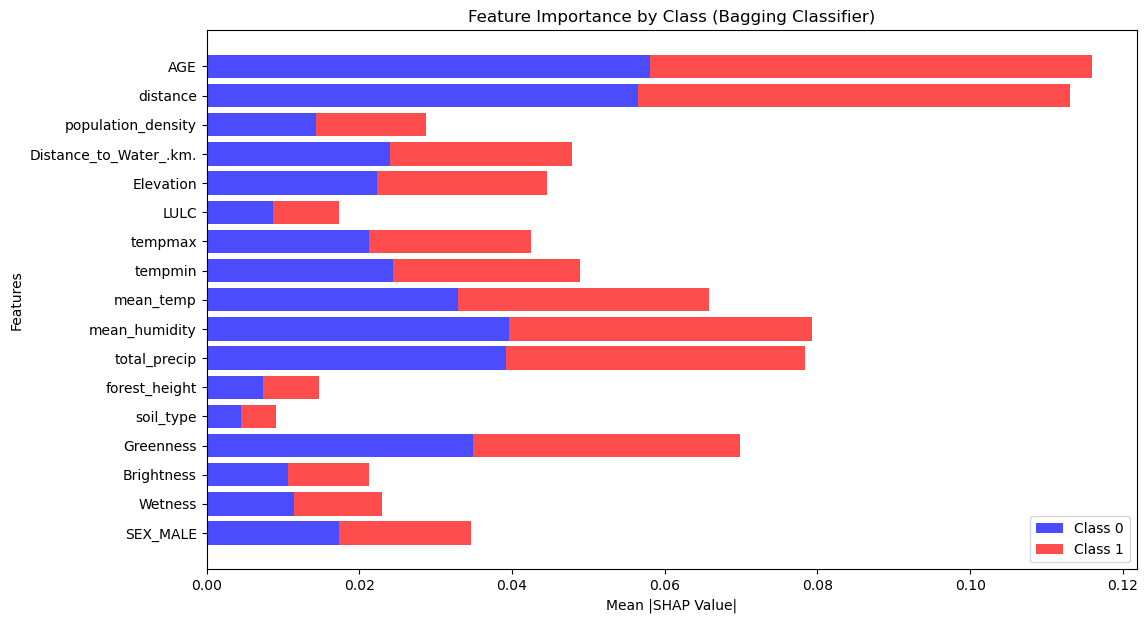

In [187]:


# Train Bagging model
bagging_model = models["Bagging"].fit(X_train_scaled, y_train)

# Initialize SHAP explainer
explainer_bagging = shap.Explainer(bagging_model.predict_proba, X_train_scaled)

# Compute SHAP values
shap_values_bagging = explainer_bagging(X_test_scaled)

# Separate SHAP values by class
shap_values_class_0 = shap_values_bagging.values[:, :, 0]  # Class 0
shap_values_class_1 = shap_values_bagging.values[:, :, 1]  # Class 1

# Compute mean absolute SHAP values for each class
mean_shap_class_0 = np.abs(shap_values_class_0).mean(axis=0)
mean_shap_class_1 = np.abs(shap_values_class_1).mean(axis=0)

# Create a grouped bar plot
feature_names = X_encoded.columns
x = np.arange(len(feature_names))

plt.figure(figsize=(12, 7))
plt.barh(x, mean_shap_class_0, color='blue', alpha=0.7, label='Class 0')
plt.barh(x, mean_shap_class_1, color='red', alpha=0.7, left=mean_shap_class_0, label='Class 1')

plt.yticks(x, feature_names)
plt.xlabel("Mean |SHAP Value|")
plt.ylabel("Features")
plt.title("Feature Importance by Class (Bagging Classifier)")
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


PermutationExplainer explainer: 262it [00:54,  3.90it/s]                                                               


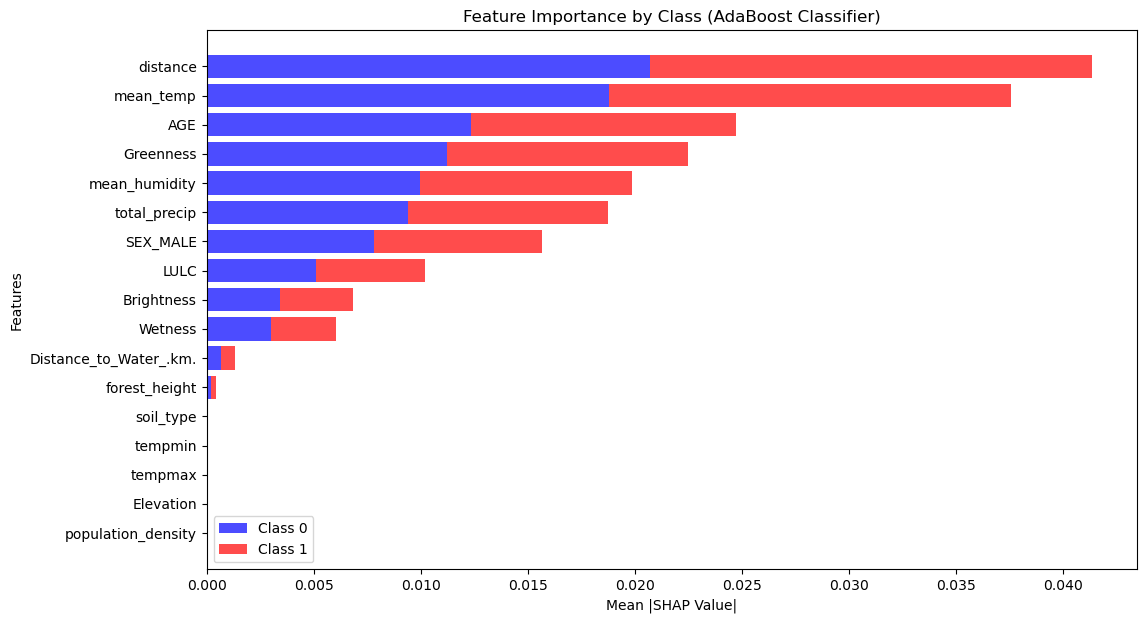

In [188]:

# Train AdaBoost model
adaboost_model = models["AdaBoost"].fit(X_train_scaled, y_train)

# Initialize SHAP explainer using predict_proba (for class-wise SHAP)
explainer_adaboost = shap.Explainer(adaboost_model.predict_proba, X_train_scaled)

#  Compute SHAP values
shap_values_adaboost = explainer_adaboost(X_test_scaled)

# Separate SHAP values by class
shap_values_class_0 = shap_values_adaboost.values[:, :, 0]  # Class 0
shap_values_class_1 = shap_values_adaboost.values[:, :, 1]  # Class 1

# Compute mean absolute SHAP values
mean_shap_values = np.abs(shap_values_adaboost.values).mean(axis=0).mean(axis=1)
mean_shap_class_0 = np.abs(shap_values_class_0).mean(axis=0)
mean_shap_class_1 = np.abs(shap_values_class_1).mean(axis=0)

# Feature names
feature_names = np.array(X_encoded.columns)

# Ensure no zero values 
mean_shap_class_0 += 1e-6
mean_shap_class_1 += 1e-6

# Sort features by importance
sorted_indices = np.argsort(mean_shap_values)[::-1]  # Sort in descending order
feature_names = feature_names[sorted_indices]
mean_shap_values = mean_shap_values[sorted_indices]
mean_shap_class_0 = mean_shap_class_0[sorted_indices]
mean_shap_class_1 = mean_shap_class_1[sorted_indices]

x = np.arange(len(feature_names))



###  Feature Importance Split by Class (Stacked Bar Plot)
plt.figure(figsize=(12, 7))
plt.barh(x, mean_shap_class_0, color='blue', alpha=0.7, label='Class 0')
plt.barh(x, mean_shap_class_1, color='red', alpha=0.7, left=mean_shap_class_0, label='Class 1')

plt.yticks(x, feature_names)
plt.xlabel("Mean |SHAP Value|")
plt.ylabel("Features")
plt.title("Feature Importance by Class (AdaBoost Classifier)")
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


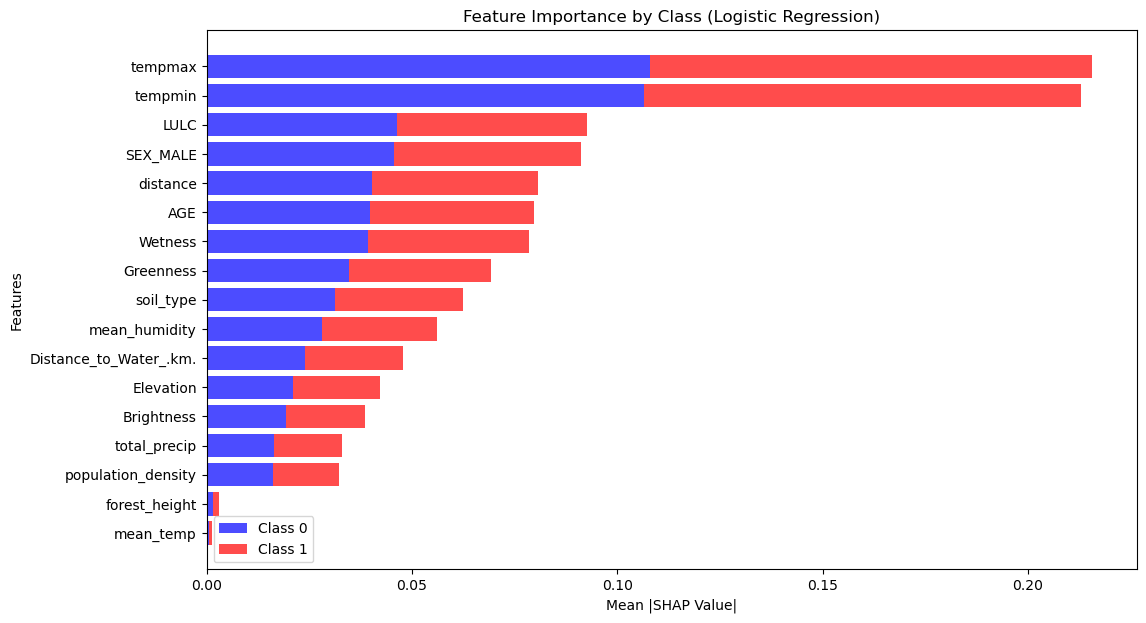

In [189]:


# Train Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear').fit(X_train_scaled, y_train)

# Initialize SHAP explainer
explainer_logreg = shap.Explainer(logreg_model.predict_proba, X_train_scaled) 

# Compute SHAP values
shap_values_logreg = explainer_logreg(X_test_scaled)

# Separate SHAP values by class
shap_values_class_0 = shap_values_logreg.values[:, :, 0]  # Class 0
shap_values_class_1 = shap_values_logreg.values[:, :, 1]  # Class 1

# Compute mean absolute SHAP values
mean_shap_values = np.abs(shap_values_logreg.values).mean(axis=0).mean(axis=1)
mean_shap_class_0 = np.abs(shap_values_class_0).mean(axis=0)
mean_shap_class_1 = np.abs(shap_values_class_1).mean(axis=0)

# Feature names
feature_names = np.array(X_encoded.columns)

# Ensure no zero values by adding a small constant (for visibility)
mean_shap_class_0 += 1e-6
mean_shap_class_1 += 1e-6

# Sort features by importance
sorted_indices = np.argsort(mean_shap_values)[::-1]  # Sort in descending order
feature_names = feature_names[sorted_indices]
mean_shap_values = mean_shap_values[sorted_indices]
mean_shap_class_0 = mean_shap_class_0[sorted_indices]
mean_shap_class_1 = mean_shap_class_1[sorted_indices]

x = np.arange(len(feature_names))



### Feature Importance Split by Class (Stacked Bar Plot)
plt.figure(figsize=(12, 7))
plt.barh(x, mean_shap_class_0, color='blue', alpha=0.7, label='Class 0')
plt.barh(x, mean_shap_class_1, color='red', alpha=0.7, left=mean_shap_class_0, label='Class 1')

plt.yticks(x, feature_names)
plt.xlabel("Mean |SHAP Value|")
plt.ylabel("Features")
plt.title("Feature Importance by Class (Logistic Regression)")
plt.legend()
plt.gca().invert_yaxis()  
plt.show()


Original SHAP values shape: (261, 17, 2)
Final SHAP values shape: (261, 17)
X_test shape: (261, 17)


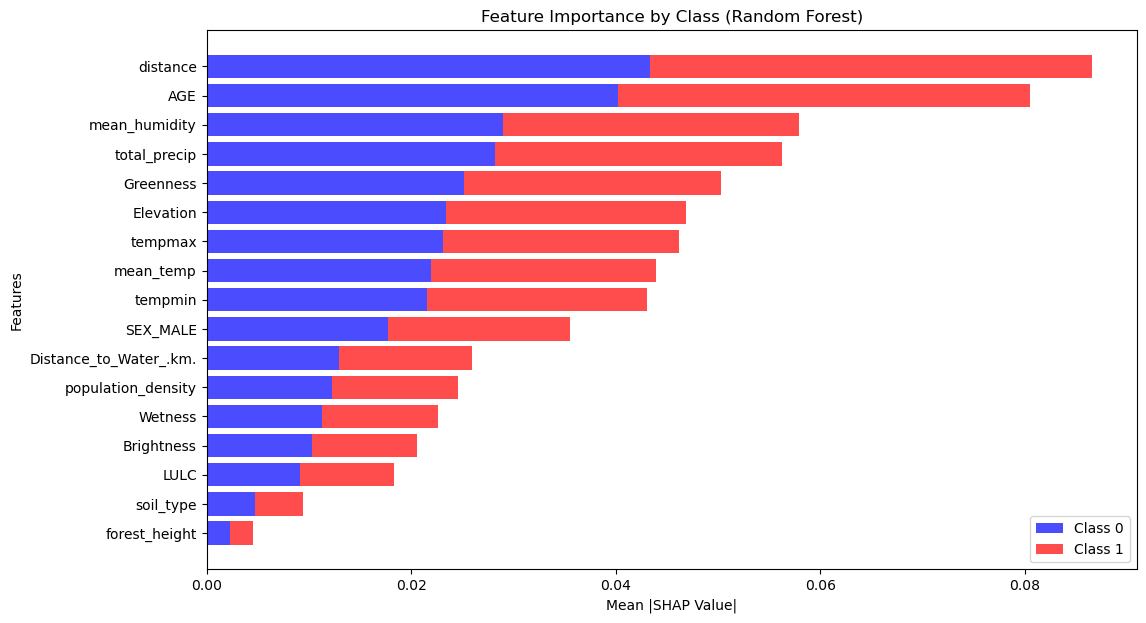

In [190]:

# Train Random Forest model
rf_model = models["Random Forest"].fit(X_train_scaled, y_train)

# Initialize SHAP using Tree Explainer
explainer_rf = shap.TreeExplainer(rf_model)

# Compute SHAP values
shap_values_rf = explainer_rf.shap_values(X_test_scaled)

#  Convert to NumPy array
shap_values_rf = np.array(shap_values_rf)  # Convert to NumPy array
print(f"Original SHAP values shape: {shap_values_rf.shape}")  

#  Handle SHAP Output for Binary Classification
if shap_values_rf.ndim == 3 and shap_values_rf.shape[2] == 2:  
    shap_values_rf_class0 = shap_values_rf[..., 0]  # SHAP values for Class 0
    shap_values_rf_class1 = shap_values_rf[..., 1]  # SHAP values for Class 1
else:
    raise ValueError(f"Unexpected SHAP shape: {shap_values_rf.shape}")

# Verify Shape
print(f"Final SHAP values shape: {shap_values_rf_class1.shape}")
print(f"X_test shape: {X_test_scaled.shape}")

# Ensure Shape Matches X_test
assert shap_values_rf_class1.shape == X_test_scaled.shape, \
    f"Shape mismatch: SHAP values {shap_values_rf_class1.shape} must match X_test {X_test_scaled.shape}."

## Feature Importance Split by Class (Stacked Bar Plot)
# Compute mean absolute SHAP values for each class
mean_shap_class_0 = np.abs(shap_values_rf_class0).mean(axis=0)
mean_shap_class_1 = np.abs(shap_values_rf_class1).mean(axis=0)

# Feature names
feature_names = np.array(X_encoded.columns)

# Sort features by total importance
total_shap_values = mean_shap_class_0 + mean_shap_class_1
sorted_indices = np.argsort(total_shap_values)[::-1]  # Sort in descending order

feature_names = feature_names[sorted_indices]
mean_shap_class_0 = mean_shap_class_0[sorted_indices]
mean_shap_class_1 = mean_shap_class_1[sorted_indices]

x = np.arange(len(feature_names))

# Plot Feature Importance Split by Class
plt.figure(figsize=(12, 7))
plt.barh(x, mean_shap_class_0, color='blue', alpha=0.7, label='Class 0')
plt.barh(x, mean_shap_class_1, color='red', alpha=0.7, left=mean_shap_class_0, label='Class 1')

plt.yticks(x, feature_names)
plt.xlabel("Mean |SHAP Value|")
plt.ylabel("Features")
plt.title("Feature Importance by Class (Random Forest)")
plt.legend()
plt.gca().invert_yaxis()  
plt.show()


  0%|          | 0/261 [00:00<?, ?it/s]

Original SHAP values shape: (261, 17, 2)
Fixed SHAP values shape: (2, 261, 17)
Final SHAP values shape: (261, 17)
X_test shape: (261, 17)


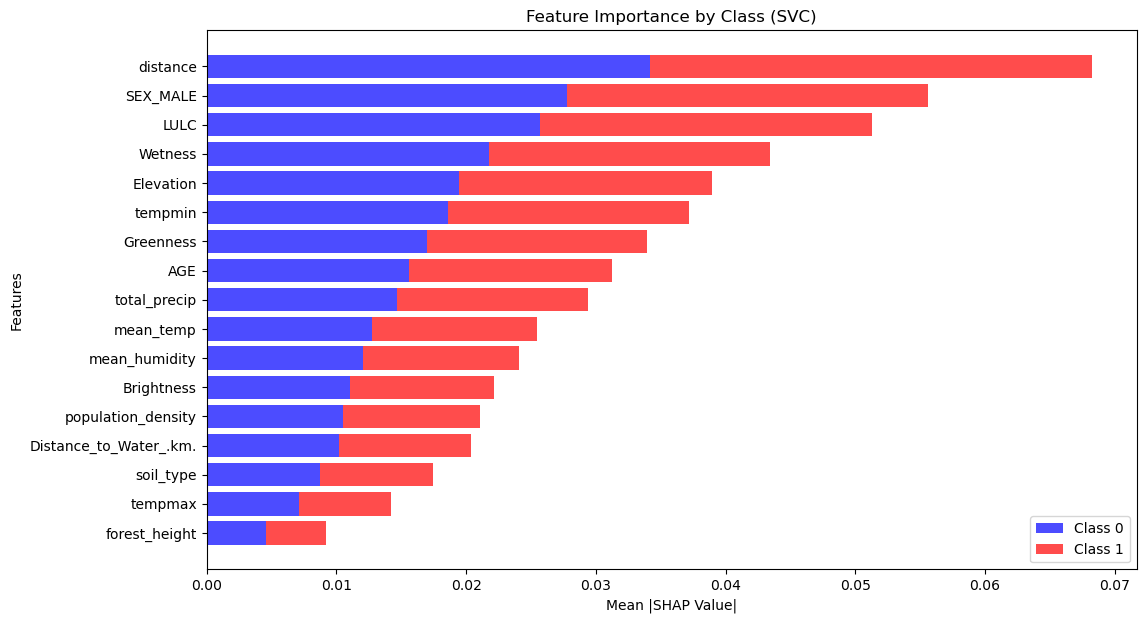

In [191]:

# Train SVC
svc_model = models["SVC"].fit(X_train_scaled, y_train)

# Using a smaller sample for the background
background_sample = shap.sample(X_train_scaled, 50)  

# Use KernelExplainer for SVC (since its blackbox)
explainer_svc = shap.KernelExplainer(svc_model.predict_proba, background_sample)
shap_values_svc = explainer_svc.shap_values(X_test_scaled)

# Convert to NumPy array and check shape
shap_values_svc = np.array(shap_values_svc)
print(f"Original SHAP values shape: {shap_values_svc.shape}") 

# Fix the shape by transposing the axes
shap_values_svc = shap_values_svc.transpose((2, 0, 1))  
print(f"Fixed SHAP values shape: {shap_values_svc.shape}")  

# Handle SHAP Output for Binary Classification
if shap_values_svc.shape[0] == 2:  
    shap_values_svc_class0 = shap_values_svc[0]  # SHAP values for Class 0
    shap_values_svc_class1 = shap_values_svc[1]  # SHAP values for Class 1
else:
    raise ValueError(f"Unexpected SHAP shape after transpose: {shap_values_svc.shape}")

# Verify Shape
print(f"Final SHAP values shape: {shap_values_svc_class1.shape}")
print(f"X_test shape: {X_test_scaled.shape}")

# Ensure Shape Matches X_test
assert shap_values_svc_class1.shape == X_test_scaled.shape, \
    f"Shape mismatch: SHAP values {shap_values_svc_class1.shape} must match X_test {X_test_scaled.shape}."


### Feature Importance Split by Class (Stacked Bar Plot)
# Compute mean absolute SHAP values for each class
mean_shap_class_0 = np.abs(shap_values_svc_class0).mean(axis=0)
mean_shap_class_1 = np.abs(shap_values_svc_class1).mean(axis=0)

# Feature names
feature_names = np.array(X_encoded.columns)

# Sort features by total importance
total_shap_values = mean_shap_class_0 + mean_shap_class_1
sorted_indices = np.argsort(total_shap_values)[::-1]  # Sort in descending order

feature_names = feature_names[sorted_indices]
mean_shap_class_0 = mean_shap_class_0[sorted_indices]
mean_shap_class_1 = mean_shap_class_1[sorted_indices]

x = np.arange(len(feature_names))

# Plot Feature Importance Split by Class
plt.figure(figsize=(12, 7))
plt.barh(x, mean_shap_class_0, color='blue', alpha=0.7, label='Class 0')
plt.barh(x, mean_shap_class_1, color='red', alpha=0.7, left=mean_shap_class_0, label='Class 1')

plt.yticks(x, feature_names)
plt.xlabel("Mean |SHAP Value|")
plt.ylabel("Features")
plt.title("Feature Importance by Class (SVC)")
plt.legend()
plt.gca().invert_yaxis()  
plt.show()


<span style="color:blue; font-weight:bold; font-size:16px;">Dependacy Plots for Bagging </span>

PermutationExplainer explainer: 262it [00:23,  6.46it/s]                                                               


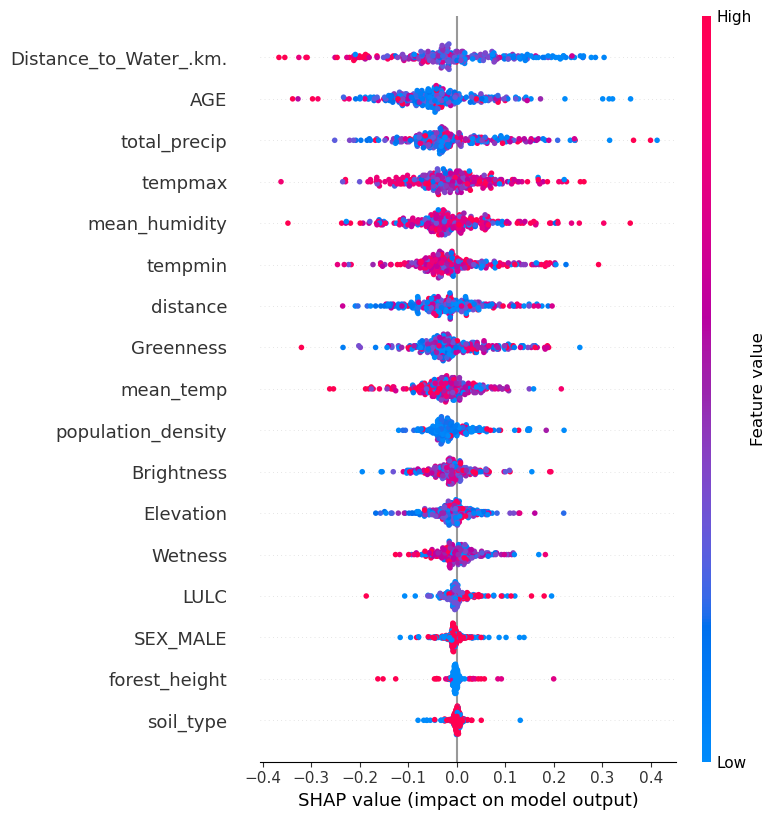

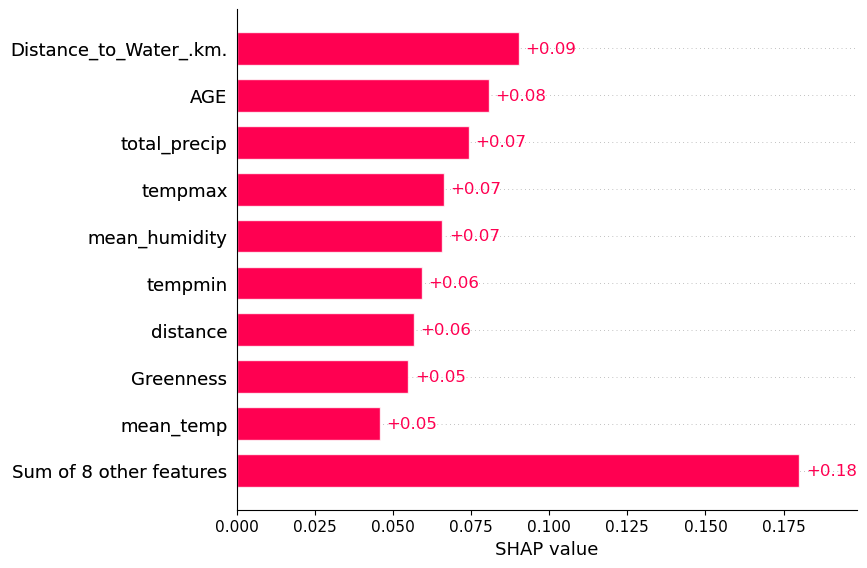

In [210]:

#  Train Bagging model on scaled data
bagging_model = models["Bagging"].fit(X_train_scaled, y_train)

#  Initialize SHAP explainer with scaled data
explainer_bagging = shap.Explainer(bagging_model.predict, X_train_scaled)

#  Compute SHAP values on scaled X_test
shap_values_bagging = explainer_bagging(X_test_scaled)

#  SHAP Summary Plot
shap.summary_plot(shap_values_bagging, X_test_scaled, feature_names=X_encoded.columns, title="Bagging Classifier SHAP")

#  Feature Importance Bar Plot with Correct Feature Names
shap_values_bagging_abs = np.abs(shap_values_bagging.values).mean(axis=0)  # Compute mean absolute SHAP values
shap_values_bagging_exp = shap.Explanation(values=shap_values_bagging_abs, feature_names=X_encoded.columns)  # Assign feature names

# Generate SHAP Feature Importance Bar Plot
shap.plots.bar(shap_values_bagging_exp)


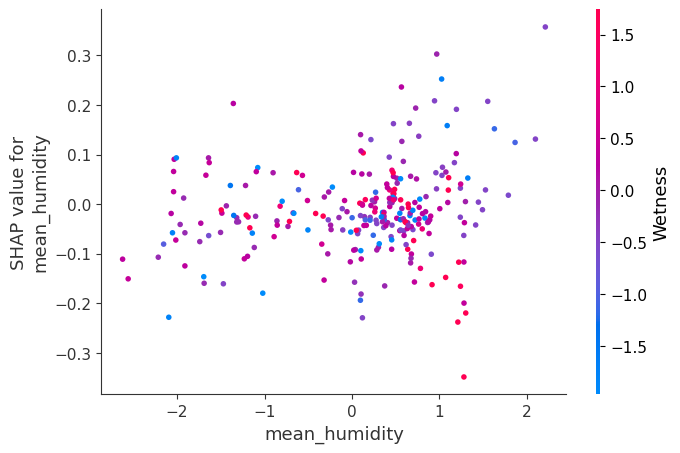

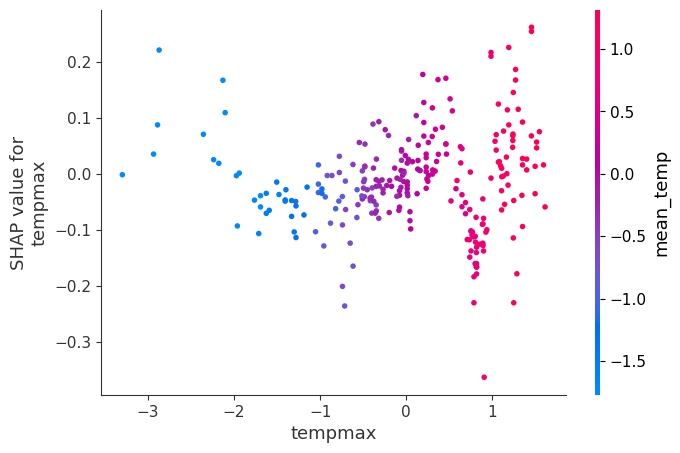

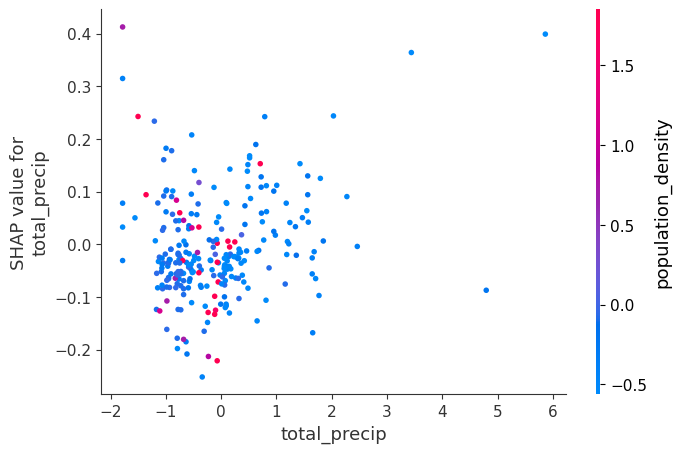

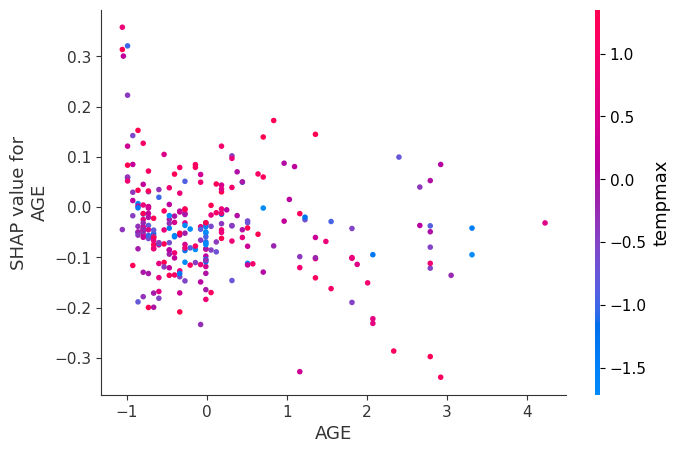

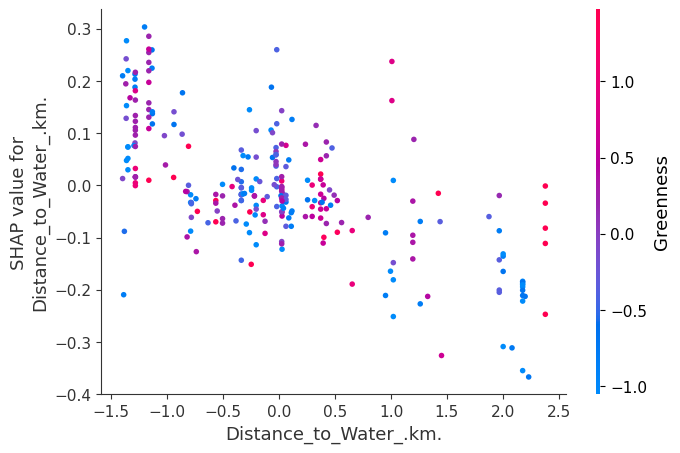

In [212]:
# Select top 5 features based on SHAP importance
top_feature_indices = np.argsort(shap_values_bagging_abs)[-5:]  
top_features = X_encoded.columns[top_feature_indices]  

# Generate SHAP Dependency Plots for the Top 5 Features
for feature in top_features:
    shap.dependence_plot(feature, shap_values_bagging.values, X_test_scaled, feature_names=X_encoded.columns)

<span style="color:blue; font-weight:bold; font-size:16px;">Looping the code 10 times </span>

In [193]:
# Define hyperparameter grids
param_grids = {
    "Random Forest": {"n_estimators": [10, 20, 40, 80, 160, 320, 640], "max_depth": [None, 5, 10, 15, 20]},
    "Decision Tree": {"max_depth": [None, 5, 10, 15, 20]},
    "SVC": {"C": [0.5, 1, 1.5], "kernel": ["rbf", "sigmoid"]},
    "Naive Bayes": {},  # No hyperparameters for GaussianNB
    "AdaBoost": {"n_estimators": [10, 20, 40, 80, 160, 320, 640], "learning_rate": [0.1, 0.2, 0.3, 0.4, 0.5]},
    "Logistic Regression": {"C": [0.5, 1, 1.5]},
    "Extra Trees": {"n_estimators": [10, 20, 40, 80, 160, 320, 640], "max_depth": [None, 5, 10, 15, 20]},
    "Bagging": {"n_estimators": [10, 20, 40, 80, 160, 320, 640], "max_samples": [0.5, 0.75, 1.0]},
}

# Define models with default parameters
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVC": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME"),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging": BaggingClassifier(DecisionTreeClassifier()),
}

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    auc = roc_auc_score(y_test, y_prob)

    return accuracy, precision, recall, f1, auc

# Feature selection
features = [
    "SEX", "AGE", "distance", "population_density", "Distance_to_Water_.km.",
    "Elevation", "LULC", "tempmax", "tempmin", "mean_temp", "mean_humidity",
    "total_precip", "forest_height", "soil_type", "Greenness", "Brightness", "Wetness",
]

# Initialize scaler
scaler = StandardScaler()

# Store best models from each run
best_models_list = []

# Run the model training 10 times
for run in range(10):
    print(f"Run {run + 1} / 10")

    metrics_data = []

    # Loop through each lag and fit models
    for lag_name, lag_data in lags.items():
        X = lag_data[features]
        y = lag_data["Infections"]

        # One-hot encode categorical variables
        X_encoded = pd.get_dummies(X, drop_first=True)

        # Scale the numerical data
        X_scaled = scaler.fit_transform(X_encoded)

        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.2, random_state=run  # Different seed per run
        )

        # Train models with hyperparameter tuning
        for model_name, model in models.items():
            param_grid = param_grids.get(model_name, {})

            if param_grid:  # Apply GridSearch if hyperparameters exist
                grid_search = GridSearchCV(model, param_grid, cv=3, scoring="accuracy")
                grid_search.fit(X_train, y_train)
                best_model = grid_search.best_estimator_
            else:
                best_model = model.fit(X_train, y_train)

            # Evaluate model
            accuracy, precision, recall, f1, auc = evaluate_model(best_model, X_test, y_test)

            # Store results
            metrics_data.append(
                {
                    "Lag": lag_name,
                    "Model": model_name,
                    "Accuracy": accuracy,
                    "Precision": precision,
                    "Recall": recall,
                    "F1-Score": f1,
                    "AUC": auc,
                }
            )

    # Convert to DataFrame
    metrics_df = pd.DataFrame(metrics_data)

    # Determine best model and lag per metric
    best_results = {
        metric: {
            "Best Lag": metrics_df.loc[metrics_df[metric].idxmax()]["Lag"],
            "Best Model": metrics_df.loc[metrics_df[metric].idxmax()]["Model"],
        }
        for metric in ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]
    }

    # Store best models from this run
    best_models_list.append(best_results)

# Convert results to DataFrame
best_models_df = pd.DataFrame(best_models_list)

# Find the most common best-performing lag and model per metric
final_best_results = {}
for metric in ["Accuracy", "Precision", "Recall", "F1-Score", "AUC"]:
    best_lag = best_models_df[metric].apply(lambda x: x["Best Lag"]).mode()[0]
    best_model = best_models_df[metric].apply(lambda x: x["Best Model"]).mode()[0]
    final_best_results[metric] = {"Best Lag": best_lag, "Best Model": best_model}

# Convert to DataFrame for structured output
final_best_results_df = pd.DataFrame(final_best_results)

# Display final structured results
print("\nFinal Best Model & Lag Across 10 Runs:")
print(final_best_results_df)


Run 1 / 10
Run 2 / 10
Run 3 / 10
Run 4 / 10
Run 5 / 10
Run 6 / 10
Run 7 / 10
Run 8 / 10
Run 9 / 10
Run 10 / 10

Final Best Model & Lag Across 10 Runs:
           Accuracy      Precision   Recall F1-Score      AUC
Best Lag         L5             L5       L5       L5       L5
Best Model  Bagging  Random Forest  Bagging  Bagging  Bagging


In [194]:
print(metrics_df)

   Lag                Model  Accuracy  Precision    Recall  F1-Score       AUC
0   L1        Random Forest  0.647510   0.649054  0.647510  0.645160  0.689446
1   L1        Decision Tree  0.578544   0.578389  0.578544  0.578433  0.625690
2   L1                  SVC  0.636015   0.640863  0.636015  0.630329  0.688624
3   L1          Naive Bayes  0.574713   0.574384  0.574713  0.574337  0.624515
4   L1             AdaBoost  0.632184   0.634964  0.632184  0.628109  0.667793
..  ..                  ...       ...        ...       ...       ...       ...
59  L8          Naive Bayes  0.597701   0.599764  0.597701  0.592186  0.631449
60  L8             AdaBoost  0.643678   0.644902  0.643678  0.641526  0.666441
61  L8  Logistic Regression  0.620690   0.621800  0.620690  0.617911  0.668880
62  L8          Extra Trees  0.639847   0.645381  0.639847  0.633858  0.701257
63  L8              Bagging  0.628352   0.629661  0.628352  0.625630  0.691151

[64 rows x 7 columns]


In [195]:
print(best_models_df)

                                            Accuracy  \
0        {'Best Lag': 'L5', 'Best Model': 'Bagging'}   
1        {'Best Lag': 'L5', 'Best Model': 'Bagging'}   
2  {'Best Lag': 'L5', 'Best Model': 'Random Forest'}   
3    {'Best Lag': 'L1', 'Best Model': 'Extra Trees'}   
4        {'Best Lag': 'L2', 'Best Model': 'Bagging'}   
5            {'Best Lag': 'L1', 'Best Model': 'SVC'}   
6  {'Best Lag': 'L4', 'Best Model': 'Random Forest'}   
7  {'Best Lag': 'L4', 'Best Model': 'Random Forest'}   
8        {'Best Lag': 'L5', 'Best Model': 'Bagging'}   
9        {'Best Lag': 'L1', 'Best Model': 'Bagging'}   

                                           Precision  \
0        {'Best Lag': 'L5', 'Best Model': 'Bagging'}   
1  {'Best Lag': 'L6', 'Best Model': 'Decision Tree'}   
2  {'Best Lag': 'L5', 'Best Model': 'Random Forest'}   
3    {'Best Lag': 'L1', 'Best Model': 'Extra Trees'}   
4        {'Best Lag': 'L2', 'Best Model': 'Bagging'}   
5    {'Best Lag': 'L2', 'Best Model': 'Extra Tr